# HOUSING : PRICE PREDICTION USE CASE

## Problem Statement:

## Columns Descriptions

## Importing the required libraries:

In [1107]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn
from sklearn.model_selection import train_test_split,cross_val_score,GridSearchCV,RandomizedSearchCV
from sklearn.ensemble import RandomForestRegressor,AdaBoostRegressor
from sklearn.linear_model import LinearRegression,ElasticNet
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
from sklearn.preprocessing import MinMaxScaler,power_transform,LabelEncoder,OrdinalEncoder,StandardScaler
from sklearn.decomposition import PCA
from scipy.stats import zscore
import warnings
warnings.filterwarnings('ignore')

## Loading the dataset:

In [1108]:
pd.set_option('display.max_columns',None)

train_dataset = pd.read_csv('house train.csv')
test_dataset = pd.read_csv('house test.csv')

In [1109]:
train_dataset.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,127,120,RL,NaN,4928,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,NPkVill,Norm,Norm,TwnhsE,1Story,6,5,1976,1976,Gable,CompShg,Plywood,Plywood,None,0.0,TA,TA,CBlock,Gd,TA,No,ALQ,120,Unf,0,958,1078,GasA,TA,Y,SBrkr,958,0,0,958,0,0,2,0,2,1,TA,5,Typ,1,TA,Attchd,1977.0,RFn,2,440,TA,TA,Y,0,205,0,0,0,0,NaN,NaN,NaN,0,2,2007,WD,Normal,128000
1,889,20,RL,95.0,15865,Pave,NaN,IR1,Lvl,AllPub,Inside,Mod,NAmes,Norm,Norm,1Fam,1Story,8,6,1970,1970,Flat,Tar&Grv,Wd Sdng,Wd Sdng,None,0.0,Gd,Gd,PConc,TA,Gd,Gd,ALQ,351,Rec,823,1043,2217,GasA,Ex,Y,SBrkr,2217,0,0,2217,1,0,2,0,4,1,Gd,8,Typ,1,TA,Attchd,1970.0,Unf,2,621,TA,TA,Y,81,207,0,0,224,0,NaN,NaN,NaN,0,10,2007,WD,Normal,268000
2,793,60,RL,92.0,9920,Pave,NaN,IR1,Lvl,AllPub,CulDSac,Gtl,NoRidge,Norm,Norm,1Fam,2Story,7,5,1996,1997,Gable,CompShg,MetalSd,MetalSd,None,0.0,Gd,TA,PConc,Gd,TA,Av,GLQ,862,Unf,0,255,1117,GasA,Ex,Y,SBrkr,1127,886,0,2013,1,0,2,1,3,1,TA,8,Typ,1,TA,Attchd,1997.0,Unf,2,455,TA,TA,Y,180,130,0,0,0,0,NaN,NaN,NaN,0,6,2007,WD,Normal,269790
3,110,20,RL,105.0,11751,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,NWAmes,Norm,Norm,1Fam,1Story,6,6,1977,1977,Hip,CompShg,Plywood,Plywood,BrkFace,480.0,TA,TA,CBlock,Gd,TA,No,BLQ,705,Unf,0,1139,1844,GasA,Ex,Y,SBrkr,1844,0,0,1844,0,0,2,0,3,1,TA,7,Typ,1,TA,Attchd,1977.0,RFn,2,546,TA,TA,Y,0,122,0,0,0,0,NaN,MnPrv,NaN,0,1,2010,COD,Normal,190000
4,422,20,RL,NaN,16635,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NWAmes,Norm,Norm,1Fam,1Story,6,7,1977,2000,Gable,CompShg,CemntBd,CmentBd,Stone,126.0,Gd,TA,CBlock,Gd,TA,No,ALQ,1246,Unf,0,356,1602,GasA,Gd,Y,SBrkr,1602,0,0,1602,0,1,2,0,3,1,Gd,8,Typ,1,TA,Attchd,1977.0,Fin,2,529,TA,TA,Y,240,0,0,0,0,0,NaN,NaN,NaN,0,6,2009,WD,Normal,215000


In [1110]:
train_dataset.shape

(1168, 81)

Train dataset is having 1168 rows and 81 columns including target column

We have target variable in train dataset which is saleprice

In [1111]:
test_dataset.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,337,20,RL,86.0,14157,Pave,NaN,IR1,HLS,AllPub,Corner,Gtl,StoneBr,Norm,Norm,1Fam,1Story,9,5,2005,2006,Hip,CompShg,VinylSd,VinylSd,Stone,200.0,Gd,TA,PConc,Ex,TA,Gd,GLQ,1249,Unf,0,673,1922,GasA,Ex,Y,SBrkr,1922,0,0,1922,1,0,2,0,3,1,Gd,8,Typ,1,Gd,Attchd,2005.0,Fin,3,676,TA,TA,Y,178,51,0,0,0,0,NaN,NaN,NaN,0,7,2007,WD,Normal
1,1018,120,RL,NaN,5814,Pave,NaN,IR1,Lvl,AllPub,CulDSac,Gtl,StoneBr,Norm,Norm,TwnhsE,1Story,8,5,1984,1984,Gable,CompShg,HdBoard,HdBoard,None,0.0,Gd,TA,CBlock,Gd,TA,Av,GLQ,1036,Unf,0,184,1220,GasA,Gd,Y,SBrkr,1360,0,0,1360,1,0,1,0,1,1,Gd,4,Typ,1,Ex,Attchd,1984.0,RFn,2,565,TA,TA,Y,63,0,0,0,0,0,NaN,NaN,NaN,0,8,2009,COD,Abnorml
2,929,20,RL,NaN,11838,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,1Story,8,5,2001,2001,Hip,CompShg,VinylSd,VinylSd,None,0.0,Gd,TA,PConc,Gd,TA,Av,Unf,0,Unf,0,1753,1753,GasA,Ex,Y,SBrkr,1788,0,0,1788,0,0,2,0,3,1,Ex,7,Typ,1,TA,Attchd,2001.0,RFn,2,522,TA,TA,Y,202,151,0,0,0,0,NaN,NaN,NaN,0,6,2009,WD,Normal
3,1148,70,RL,75.0,12000,Pave,NaN,Reg,Bnk,AllPub,Inside,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,7,1941,1950,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,TA,TA,No,Rec,275,Unf,0,429,704,GasA,Ex,Y,SBrkr,860,704,0,1564,0,0,1,1,3,1,Fa,7,Typ,1,Gd,Attchd,1941.0,Unf,1,234,TA,TA,Y,0,0,0,0,0,0,NaN,NaN,NaN,0,7,2009,WD,Normal
4,1227,60,RL,86.0,14598,Pave,NaN,IR1,Lvl,AllPub,CulDSac,Gtl,Somerst,Feedr,Norm,1Fam,2Story,6,5,2007,2007,Gable,CompShg,VinylSd,VinylSd,Stone,74.0,Gd,TA,PConc,Gd,TA,Mn,Unf,0,Unf,0,894,894,GasA,Ex,Y,SBrkr,894,1039,0,1933,0,0,2,1,4,1,Gd,9,Typ,1,Gd,BuiltIn,2007.0,Fin,3,668,TA,TA,Y,100,18,0,0,0,0,NaN,NaN,NaN,0,1,2008,WD,Normal


In [1112]:
test_dataset.shape

(292, 80)

Train dataset is having 292 rows and 80 columns excluding target column

We don't have target variable in the test dataset

## Lets combine these datasets for data preprocessing

In [1113]:
#lets make temperory column called temp which will show train and test dataset in future.
train_dataset['Temp'] = 'Train'
test_dataset['Temp'] = 'Test'
df = pd.concat([train_dataset,test_dataset],ignore_index= True)
df

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,Temp
0,127,120,RL,NaN,4928,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,NPkVill,Norm,Norm,TwnhsE,1Story,6,5,1976,1976,Gable,CompShg,Plywood,Plywood,None,0.0,TA,TA,CBlock,Gd,TA,No,ALQ,120,Unf,0,958,1078,GasA,TA,Y,SBrkr,958,0,0,958,0,0,2,0,2,1,TA,5,Typ,1,TA,Attchd,1977.0,RFn,2,440,TA,TA,Y,0,205,0,0,0,0,NaN,NaN,NaN,0,2,2007,WD,Normal,128000.0,Train
1,889,20,RL,95.0,15865,Pave,NaN,IR1,Lvl,AllPub,Inside,Mod,NAmes,Norm,Norm,1Fam,1Story,8,6,1970,1970,Flat,Tar&Grv,Wd Sdng,Wd Sdng,None,0.0,Gd,Gd,PConc,TA,Gd,Gd,ALQ,351,Rec,823,1043,2217,GasA,Ex,Y,SBrkr,2217,0,0,2217,1,0,2,0,4,1,Gd,8,Typ,1,TA,Attchd,1970.0,Unf,2,621,TA,TA,Y,81,207,0,0,224,0,NaN,NaN,NaN,0,10,2007,WD,Normal,268000.0,Train
2,793,60,RL,92.0,9920,Pave,NaN,IR1,Lvl,AllPub,CulDSac,Gtl,NoRidge,Norm,Norm,1Fam,2Story,7,5,1996,1997,Gable,CompShg,MetalSd,MetalSd,None,0.0,Gd,TA,PConc,Gd,TA,Av,GLQ,862,Unf,0,255,1117,GasA,Ex,Y,SBrkr,1127,886,0,2013,1,0,2,1,3,1,TA,8,Typ,1,TA,Attchd,1997.0,Unf,2,455,TA,TA,Y,180,130,0,0,0,0,NaN,NaN,NaN,0,6,2007,WD,Normal,269790.0,Train
3,110,20,RL,105.0,11751,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,NWAmes,Norm,Norm,1Fam,1Story,6,6,1977,1977,Hip,CompShg,Plywood,Plywood,BrkFace,480.0,TA,TA,CBlock,Gd,TA,No,BLQ,705,Unf,0,1139,1844,GasA,Ex,Y,SBrkr,1844,0,0,1844,0,0,2,0,3,1,TA,7,Typ,1,TA,Attchd,1977.0,RFn,2,546,TA,TA,Y,0,122,0,0,0,0,NaN,MnPrv,NaN,0,1,2010,COD,Normal,190000.0,Train
4,422,20,RL,NaN,16635,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NWAmes,Norm,Norm,1Fam,1Story,6,7,1977,2000,Gable,CompShg,CemntBd,CmentBd,Stone,126.0,Gd,TA,CBlock,Gd,TA,No,ALQ,1246,Unf,0,356,1602,GasA,Gd,Y,SBrkr,1602,0,0,1602,0,1,2,0,3,1,Gd,8,Typ,1,TA,Attchd,1977.0,Fin,2,529,TA,TA,Y,240,0,0,0,0,0,NaN,NaN,NaN,0,6,2009,WD,Normal,215000.0,Train
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,83,20,RL,78.0,10206,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Somerst,Norm,Norm,1Fam,1Story,8,5,2007,2007,Gable,CompShg,VinylSd,VinylSd,Stone,468.0,TA,TA,PConc,Gd,TA,No,GLQ,33,Unf,0,1530,1563,GasA,Ex,Y,SBrkr,1563,0,0,1563,0,0,2,0,3,1,Gd,6,Typ,1,Gd,Attchd,2007.0,RFn,3,758,TA,TA,Y,144,99,0,0,0,0,NaN,NaN,NaN,0,10,2008,WD,Normal,NaN,Test
1456,1048,20,RL,57.0,9245,Pave,NaN,IR2,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,1Story,5,5,1994,1995,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,GLQ,686,Unf,0,304,990,GasA,Ex,Y,SBrkr,990,0,0,990,0,1,1,0,3,1,TA,5,Typ,0,NaN,Detchd,1996.0,Unf,2,672,TA,TA,Y,0,0,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,NaN,Test
1457,17,20,RL,NaN,11241,Pave,NaN,IR1,Lvl,AllPub,CulDSac,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,7,1970,1970,Gable,CompShg,Wd Sdng,Wd Sdng,BrkFace,180.0,TA,TA,CBlock,TA,TA,No,ALQ,578,Unf,0,426,1004,GasA,Ex,Y,SBrkr,1004,0,0,1004,1,0,1,0,2,1,TA,5,Typ,1,TA,Attchd,1970.0,Fin,2,480,TA,TA,Y,0,0,0,0,0,0,NaN,NaN,Shed,700,3,2010,WD,Normal,NaN,Test
1458,523,50,RM,50.0,5000,Pave,NaN,Reg,Lvl,AllPub,Corner,Gtl,BrkSide,Feedr,Norm,1Fam,1.5Fin,6,7,1947,1950,Gable,CompShg,CemntBd,Cment

Now we have 1460 rows and 82 columns including temparory column, which will be removed later

We don't have target variable in the rows where Test is present in temparory column

## EDA (Exploratory Data Analysis)

In [1114]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 82 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [1115]:
df.shape

(1460, 82)

Now we have 1460 rows and 82 columns

In [1116]:
df.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

SalesPrice the target columns, Temp is Temporary columns, Rest all columns are indepenedent columns

In [1117]:
df.dtypes

Id                 int64
MSSubClass         int64
MSZoning          object
LotFrontage      float64
LotArea            int64
                  ...   
YrSold             int64
SaleType          object
SaleCondition     object
SalePrice        float64
Temp              object
Length: 82, dtype: object

We have int, float and object datatyped columns

In [1118]:
#lets check for null values
x = 0
print("NULL VALUES COUNT\n")
for i in df.columns:
    if df[i].isnull().sum() != 0:
        x += 1
        print("{} : {}".format(i,df[i].isnull().sum()))

print("\nOut of 81 Columns {} columns are having Null values".format(x))

NULL VALUES COUNT

LotFrontage : 259
Alley : 1369
MasVnrType : 8
MasVnrArea : 8
BsmtQual : 37
BsmtCond : 37
BsmtExposure : 38
BsmtFinType1 : 37
BsmtFinType2 : 38
Electrical : 1
FireplaceQu : 690
GarageType : 81
GarageYrBlt : 81
GarageFinish : 81
GarageQual : 81
GarageCond : 81
PoolQC : 1453
Fence : 1179
MiscFeature : 1406
SalePrice : 292

Out of 81 Columns 20 columns are having Null values


In [1119]:
#lets print out the object columns with unique values
for i in df.columns:
    if df[i].dtype == 'object':
        print("{} : {}".format(i,len(pd.unique(df[i]))))

MSZoning : 5
Street : 2
Alley : 3
LotShape : 4
LandContour : 4
Utilities : 2
LotConfig : 5
LandSlope : 3
Neighborhood : 25
Condition1 : 9
Condition2 : 8
BldgType : 5
HouseStyle : 8
RoofStyle : 6
RoofMatl : 8
Exterior1st : 15
Exterior2nd : 16
MasVnrType : 5
ExterQual : 4
ExterCond : 5
Foundation : 6
BsmtQual : 5
BsmtCond : 5
BsmtExposure : 5
BsmtFinType1 : 7
BsmtFinType2 : 7
Heating : 6
HeatingQC : 5
CentralAir : 2
Electrical : 6
KitchenQual : 4
Functional : 7
FireplaceQu : 6
GarageType : 7
GarageFinish : 4
GarageQual : 6
GarageCond : 6
PavedDrive : 3
PoolQC : 4
Fence : 5
MiscFeature : 5
SaleType : 9
SaleCondition : 6
Temp : 2


We can see the count of unique values in all object coulmns

In [1120]:
#lets print out the columns with unique values
for i in df.columns:
    if df[i].dtype == 'object':
        print('\n')
        print(i,df[i].value_counts())



MSZoning RL         1151
RM          218
FV           65
RH           16
C (all)      10
Name: MSZoning, dtype: int64


Street Pave    1454
Grvl       6
Name: Street, dtype: int64


Alley Grvl    50
Pave    41
Name: Alley, dtype: int64


LotShape Reg    925
IR1    484
IR2     41
IR3     10
Name: LotShape, dtype: int64


LandContour Lvl    1311
Bnk      63
HLS      50
Low      36
Name: LandContour, dtype: int64


Utilities AllPub    1459
NoSeWa       1
Name: Utilities, dtype: int64


LotConfig Inside     1052
Corner      263
CulDSac      94
FR2          47
FR3           4
Name: LotConfig, dtype: int64


LandSlope Gtl    1382
Mod      65
Sev      13
Name: LandSlope, dtype: int64


Neighborhood NAmes      225
CollgCr    150
OldTown    113
Edwards    100
Somerst     86
Gilbert     79
NridgHt     77
Sawyer      74
NWAmes      73
SawyerW     59
BrkSide     58
Crawfor     51
Mitchel     49
NoRidge     41
Timber      38
IDOTRR      37
ClearCr     28
SWISU       25
StoneBr     25
MeadowV     

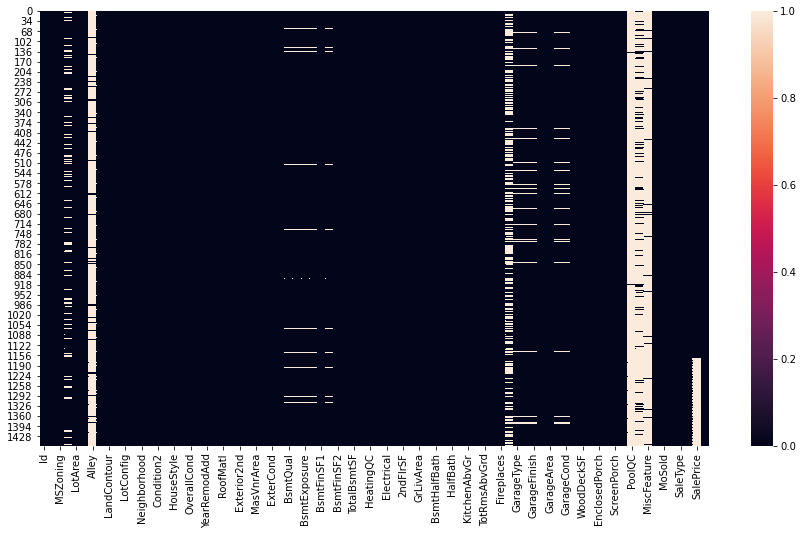

In [1121]:
#lets check for null values with visualization method
plt.figure(figsize=(15,8))
sns.heatmap(df.isnull())
plt.show()

In [1122]:
#we can see a lot of null values in this dataset

## Data Preprocessing

### Handling the Null values in the dataset

In [1123]:
#lets check for null values
x = 0
print("NULL VALUES COUNT\n")
for i in df.columns:
    if df[i].isnull().sum() != 0:
        x += 1
        print("{} : {}".format(i,df[i].isnull().sum()))

print("\nOut of 81 Columns {} columns are having Null values".format(x))

NULL VALUES COUNT

LotFrontage : 259
Alley : 1369
MasVnrType : 8
MasVnrArea : 8
BsmtQual : 37
BsmtCond : 37
BsmtExposure : 38
BsmtFinType1 : 37
BsmtFinType2 : 38
Electrical : 1
FireplaceQu : 690
GarageType : 81
GarageYrBlt : 81
GarageFinish : 81
GarageQual : 81
GarageCond : 81
PoolQC : 1453
Fence : 1179
MiscFeature : 1406
SalePrice : 292

Out of 81 Columns 20 columns are having Null values


In [1124]:
#we can drop pool quality or Pool size column since it has only 1453 nan values out of 1460 values, which is more than 99 %
#we have only 7 houses with pool among 1460  house
df.loc[df.PoolQC.isnull() == False]

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,Temp
141,1183,60,RL,160.0,15623,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,NoRidge,Norm,Norm,1Fam,2Story,10,5,1996,1996,Hip,CompShg,Wd Sdng,ImStucc,None,0.0,Gd,TA,PConc,Ex,TA,Av,GLQ,2096,Unf,0,300,2396,GasA,Ex,Y,SBrkr,2411,2065,0,4476,1,0,3,1,4,1,Ex,10,Typ,2,TA,Attchd,1996.0,Fin,3,813,TA,TA,Y,171,78,0,0,0,555,Ex,MnPrv,NaN,0,7,2007,WD,Abnorml,745000.0,Train
214,1171,80,RL,76.0,9880,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Mitchel,Norm,Norm,1Fam,SLvl,6,6,1977,1977,Gable,CompShg,Plywood,Plywood,None,0.0,TA,TA,CBlock,TA,TA,Av,ALQ,522,Unf,0,574,1096,GasA,TA,Y,SBrkr,1118,0,0,1118,1,0,1,0,3,1,TA,6,Typ,1,Po,Attchd,1977.0,Fin,1,358,TA,TA,Y,203,0,0,0,0,576,Gd,GdPrv,NaN,0,7,2008,WD,Normal,171000.0,Train
310,1424,80,RL,NaN,19690,Pave,NaN,IR1,Lvl,AllPub,CulDSac,Gtl,Edwards,Norm,Norm,1Fam,SLvl,6,7,1966,1966,Flat,Tar&Grv,Plywood,Plywood,None,0.0,Gd,Gd,CBlock,Gd,TA,Av,Unf,0,Unf,0,697,697,GasA,TA,Y,SBrkr,1575,626,0,2201,0,0,2,0,4,1,Gd,8,Typ,1,Gd,Attchd,1966.0,Unf,2,432,Gd,Gd,Y,586,236,0,0,0,738,Gd,GdPrv,NaN,0,8,2006,WD,Alloca,274970.0,Train
572,1387,60,RL,80.0,16692,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,NWAmes,RRAn,Norm,1Fam,2Story,7,5,1978,1978,Gable,CompShg,Plywood,Plywood,BrkFace,184.0,TA,TA,CBlock,Gd,TA,No,BLQ,790,LwQ,469,133,1392,GasA,TA,Y,SBrkr,1392,1392,0,2784,1,0,3,1,5,1,Gd,12,Typ,2,TA,Attchd,1978.0,RFn,2,564,TA,TA,Y,0,112,0,0,440,519,Fa,MnPrv,TenC,2000,7,2006,WD,Normal,250000.0,Train
592,1299,60,RL,313.0,63887,Pave,NaN,IR3,Bnk,AllPub,Corner,Gtl,Edwards,Feedr,Norm,1Fam,2Story,10,5,2008,2008,Hip,ClyTile,Stucco,Stucco,Stone,796.0,Ex,TA,PConc,Ex,TA,Gd,GLQ,5644,Unf,0,466,6110,GasA,Ex,Y,SBrkr,4692,950,0,5642,2,0,2,1,3,1,Ex,12,Typ,3,Gd,Attchd,2008.0,Fin,2,1418,TA,TA,Y,214,292,0,0,0,480,Gd,NaN,NaN,0,1,2008,New,Partial,160000.0,Train
920,811,20,RL,78.0,10140,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NWAmes,Norm,Norm,1Fam,1Story,6,6,1974,1999,Hip,CompShg,HdBoard,HdBoard,BrkFace,99.0,TA,TA,CBlock,TA,TA,No,ALQ,663,LwQ,377,0,1040,GasA,Fa,Y,SBrkr,1309,0,0,1309,1,0,1,1,3,1,Gd,5,Typ,1,Fa,Attchd,1974.0,RFn,2,484,TA,TA,Y,265,0,0,0,0,648,Fa,GdPrv,NaN,0,1,2006,WD,Normal,181000.0,Train
1120,198,75,RL,174.0,25419,Pave,NaN,Reg,Lvl,AllPub,Corner,Gtl,NAmes,Artery,Norm,1Fam,2Story,8,4,1918,1990,Gable,CompShg,Stucco,Stucco,None,0.0,Gd,Gd,PConc,TA,TA,No,GLQ,1036,LwQ,184,140,1360,GasA,Gd,Y,SBrkr,1360,1360,392,3112,1,1,2,0,4,1,Gd,8,Typ,1,Ex,Detchd,1918.0,Unf,2,795,TA,TA,Y,0,16,552,0,0,512,Ex,GdPrv,NaN,0,3,2006,WD,Abnorml,235000.0,Train


In [1125]:
#we can see that all 1453 values are zero because there are no pools in the house
pd.unique(df.PoolArea)

array([  0, 555, 576, 738, 519, 480, 648, 512], dtype=int64)

In [1126]:
#so lets drop the pool area column since we have pool quality 
df.drop("PoolArea",axis=1,inplace= True)

In [1127]:
#As per descriptoion we can replace Nan values in pool quality column with "No pool"
df.PoolQC.fillna("No Pool",inplace= True)

In [1128]:
pd.unique(df.PoolQC)

array(['No Pool', 'Ex', 'Gd', 'Fa'], dtype=object)

In [1129]:
#we can also drop  Miscellaneous feature columns as it is having more than 95% null values
df.drop("MiscFeature",axis=1,inplace= True)

In [1130]:
#As per description In Fence column we can fill No fence in place of NAN values
pd.unique(df.Fence)

array([nan, 'MnPrv', 'GdPrv', 'GdWo', 'MnWw'], dtype=object)

In [1131]:
df.Fence.fillna("No Fence",inplace= True)

In [1132]:
#As per description In Fire place column we can fill Nan values with No fire Place
pd.unique(df.FireplaceQu)

array(['TA', 'Gd', nan, 'Fa', 'Ex', 'Po'], dtype=object)

In [1133]:
df.FireplaceQu.fillna("No Fire Place",inplace= True)

In [1134]:
#As per description In Alley column we can fill Nan values with No alley Access

In [1135]:
pd.unique(df.Alley)

array([nan, 'Grvl', 'Pave'], dtype=object)

In [1136]:
df.Alley.fillna("No Alley Access",inplace= True)

In [1137]:
#Now we have almost replaced the null values in columns where the NAN values are high

In [1138]:
#As per description In garage related columns we can replace nan values with No garage

df.GarageCond.fillna("No Garage",inplace= True)
df.GarageQual.fillna("No Garage",inplace= True)
df.GarageType.fillna("No Garage",inplace= True)
df.GarageFinish.fillna("No Garage",inplace= True)

In [1139]:
#As per description In Basement related columns we can replace nan values with No Basement

df.BsmtQual.fillna("No Basement",inplace= True)
df.BsmtCond.fillna("No Basement",inplace= True)
df.BsmtExposure.fillna("No Basement",inplace= True)
df.BsmtFinType1.fillna("No Basement",inplace= True)
df.BsmtFinType2.fillna("No Basement",inplace= True)

In [1140]:
#lets check for null values
x = 0
print("NULL VALUES COUNT\n")
for i in df.columns:
    if df[i].isnull().sum() != 0:
        x += 1
        print("{} : {}".format(i,df[i].isnull().sum()))

print("\nOut of 81 Columns {} columns are having Null values".format(x))

NULL VALUES COUNT

LotFrontage : 259
MasVnrType : 8
MasVnrArea : 8
Electrical : 1
GarageYrBlt : 81
SalePrice : 292

Out of 81 Columns 6 columns are having Null values


In [1141]:
#lets replace the object columns with mode of the column
df.MasVnrType.fillna(df.MasVnrType.mode()[0],inplace= True)
df.Electrical.fillna(df.Electrical.mode()[0],inplace= True)

In [1142]:
#we can replace the garage bulit year and MasVnrArea with mean since theere are very less values
df.MasVnrArea.fillna(df.MasVnrArea.mean(),inplace= True)
df.GarageYrBlt.fillna(df.GarageYrBlt.mean(),inplace= True)

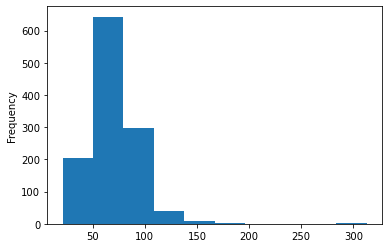

In [1143]:
#now we have these four columns with NAN values
#SalesPrice Target column where  the Test data is not provided

#lets check the distribution of the three columns before replacing null values with mean or median

df.LotFrontage.plot(kind = 'hist')
plt.show()

In [1144]:
#Since the above column  is right skewed lets replace it with median
df.LotFrontage.fillna(df.LotFrontage.median(),inplace= True)

In [1145]:
#we can drop this ID column since it is useless and all the values are unique

len(pd.unique(df.Id))

1460

In [1146]:
df.drop('Id',axis=1,inplace=True)

In [1147]:
#lets check the unique number of unique values in all object columns
for i in df.columns:
    if df[i].dtype == 'object':
        print(i,len(pd.unique(df[i])))

MSZoning 5
Street 2
Alley 3
LotShape 4
LandContour 4
Utilities 2
LotConfig 5
LandSlope 3
Neighborhood 25
Condition1 9
Condition2 8
BldgType 5
HouseStyle 8
RoofStyle 6
RoofMatl 8
Exterior1st 15
Exterior2nd 16
MasVnrType 4
ExterQual 4
ExterCond 5
Foundation 6
BsmtQual 5
BsmtCond 5
BsmtExposure 5
BsmtFinType1 7
BsmtFinType2 7
Heating 6
HeatingQC 5
CentralAir 2
Electrical 5
KitchenQual 4
Functional 7
FireplaceQu 6
GarageType 7
GarageFinish 4
GarageQual 6
GarageCond 6
PavedDrive 3
PoolQC 4
Fence 5
SaleType 9
SaleCondition 6
Temp 2


### Now there are no columns with Null Values

## Statistical Summary

In [1148]:
#Lets check the statistical summary of Numerical Columns
df.describe()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1168.000000
mean,56.897260,69.863699,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,46.549315,567.240411,1057.429452,1162.626712,346.992466,5.844521,1515.463699,0.425342,0.057534,1.565068,0.382877,2.866438,1.046575,6.517808,0.613014,1978.506164,1.767123,472.980137,94.244521,46.660274,21.954110,3.409589,15.060959,43.489041,6.321918,2007.815753,181477.005993
std,42.300571,22.027677,9981.264932,1.382997,1.112799,30.202904,20.645407,180.569112,456.098091,161.319273,441.866955,438.705324,386.587738,436.528436,48.623081,525.480383,0.518911,0.238753,0.550916,0.502885,0.815778,0.220338,1.625393,0.644666,23.994583,0.747315,213.804841,125.338794,66.256028,61.119149,29.317331,55.757415,496.123024,2.703626,1.328095,79105.586863
min,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,1900.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,20.000000,60.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,0.000000,223.000000,795.750000,882.000000,0.000000,0.000000,1129.500000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,5.000000,0.000000,1962.000000,1.000000,334.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,130375.000000
50%,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,0.000000,477.500000,991.500000,1087.000000,0.000000,0.000000,1464.000000,0.000000,0.000000,2.000000,0.000000,3.000000,1.000000,6.000000,1.000000,1978.506164,2.000000,480.000000,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163995.000000
75%,70.000000,79.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,164.250000,712.250000,0.000000,808.000000,1298.250000,1391.250000,728.000000,0.000000,1776.750000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000,7.000000,1.000000,2001.000000,2.000000,576.000000,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,215000.000000
max,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,2336.000000,6110.000000,4692.000000,2065.000000,572.000000,5642.000000,3.000000,2.000000,3.000000,2.000000,8.000000,3.000000,14.000000,3.000000,2010.000000,4.000000,1418.000000,857.000000,547.000000,552.000000,508.000000,480.000000,15500.000000,12.000000,2010.000000,755000.000000


In [1149]:
#lets check for correlation among all the columns
df.corr()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,MiscVal,MoSold,YrSold,SalePrice
MSSubClass,1.000000,-0.356718,-0.139781,0.032628,-0.059316,0.027850,0.040581,0.022895,-0.069836,-0.065649,-0.140759,-0.238518,-0.251758,0.307886,0.046474,0.074853,0.003491,-0.002333,0.131608,0.177354,-0.023438,0.281721,0.040380,-0.045569,0.080187,-0.040110,-0.098672,-0.012579,-0.006100,-0.012037,-0.043825,-0.026030,-0.007683,-0.013585,-0.021407,-0.060775
LotFrontage,-0.356718,1.000000,0.304522,0.234812,-0.053281,0.116685,0.083348,0.179042,0.214367,0.042463,0.124098,0.363472,0.413773,0.072388,0.037469,0.368007,0.090343,-0.006979,0.180534,0.047222,0.236840,-0.004905,0.320518,0.233221,0.064370,0.269539,0.323511,0.075542,0.137014,0.010287,0.061945,0.037655,-0.000255,0.010451,0.006380,0.323828
LotArea,-0.139781,0.304522,1.000000,0.105806,-0.005636,0.014228,0.013788,0.103960,0.214103,0.111170,-0.002618,0.260833,0.299475,0.050986,0.004779,0.263116,0.158155,0.048046,0.126031,0.014259,0.119690,-0.017784,0.190015,0.271364,-0.024812,0.154871,0.180403,0.171698,0.084774,-0.018340,0.020423,0.043160,0.038068,0.001205,-0.014261,0.249499
OverallQual,0.032628,0.234812,0.105806,1.000000,-0.091932,0.572323,0.550684,0.410238,0.239666,-0.059119,0.308159,0.537808,0.476224,0.295493,-0.030429,0.593007,0.111098,-0.040150,0.550600,0.273458,0.101676,-0.183882,0.427452,0.396765,0.518018,0.600671,0.562022,0.238923,0.308819,-0.113937,0.030371,0.064886,-0.031406,0.070815,-0.027347,0.789185
OverallCond,-0.059316,-0.053281,-0.005636,-0.091932,1.000000,-0.375983,0.073741,-0.127788,-0.046231,0.040229,-0.136841,-0.171098,-0.144203,0.028942,0.025494,-0.079686,-0.054942,0.117821,-0.194149,-0.060769,0.012980,-0.087001,-0.057583,-0.023820,-0.306169,-0.185758,-0.151521,-0.003334,-0.032589,0.070356,0.025504,0.054811,0.068777,-0.003511,0.043950,-0.065642
YearBuilt,0.027850,0.116685,0.014228,0.572323,-0.375983,1.000000,0.592855,0.314745,0.249503,-0.049107,0.149040,0.391452,0.281986,0.010308,-0.183784,0.199010,0.187599,-0.038162,0.468271,0.242656,-0.070651,-0.174800,0.095589,0.147716,0.780555,0.537850,0.478954,0.224880,0.188686,-0.387268,0.031355,-0.050364,-0.034383,0.012398,-0.013618,0.514408
YearRemodAdd,0.040581,0.083348,0.013788,0.550684,0.073741,0.592855,1.000000,0.179186,0.128451,-0.067759,0.181133,0.291066,0.240379,0.140024,-0.062419,0.287389,0.119470,-0.012337,0.439046,0.183331,-0.040581,-0.149598,0.191740,0.112581,0.618130,0.420622,0.371600,0.205726,0.226298,-0.193919,0.045286,-0.038740,-0.010286,0.021490,0.035743,0.507831
MasVnrArea,0.022895,0.179042,0.103960,0.410238,-0.127788,0.314745,0.179186,1.000000,0.263582,-0.072302,0.114184,0.362452,0.342160,0.174019,-0.069068,0.389893,0.085055,0.026669,0.275730,0.200802,0.102417,-0.037364,0.280027,0.247906,0.249367,0.363778,0.372567,0.159349,0.124965,-0.109849,0.018795,0.061453,-0.029815,-0.005940,-0.008184,0.463662
BsmtFinSF1,-0.069836,0.214367,0.214103,0.239666,-0.046231,0.249503,0.128451,0.263582,1.000000,-0.050117,-0.495251,0.522396,0.445863,-0.137079,-0.064503,0.208171,0.649212,0.067418,0.058543,0.004262,-0.107355,-0.081007,0.044316,0.260011,0.150338,0.224054,0.296970,0.204306,0.111761,-0.102303,0.026451,0.062021,0.003571,-0.015727,0.014359,0.362874
BsmtFinSF2,-0.065649,0.042463,0.111170,-0.059119,0.040229,-0.049107,-0.067759,-0.072302,-0.050117,1.000000,-0.209294,0.104810,0.097117,-0.099260,0.014807,-0.009640,0.158678,0.070948,-0.076444,-0.032148,-0.015728,-0.040751,-0.035227,0.046921,-0.087126,-0.038264,-0.018227,0.067898,0.003093,0.036543,-0.029993,0.088871,0.004940,-0.015211,0.031706,-0.010151


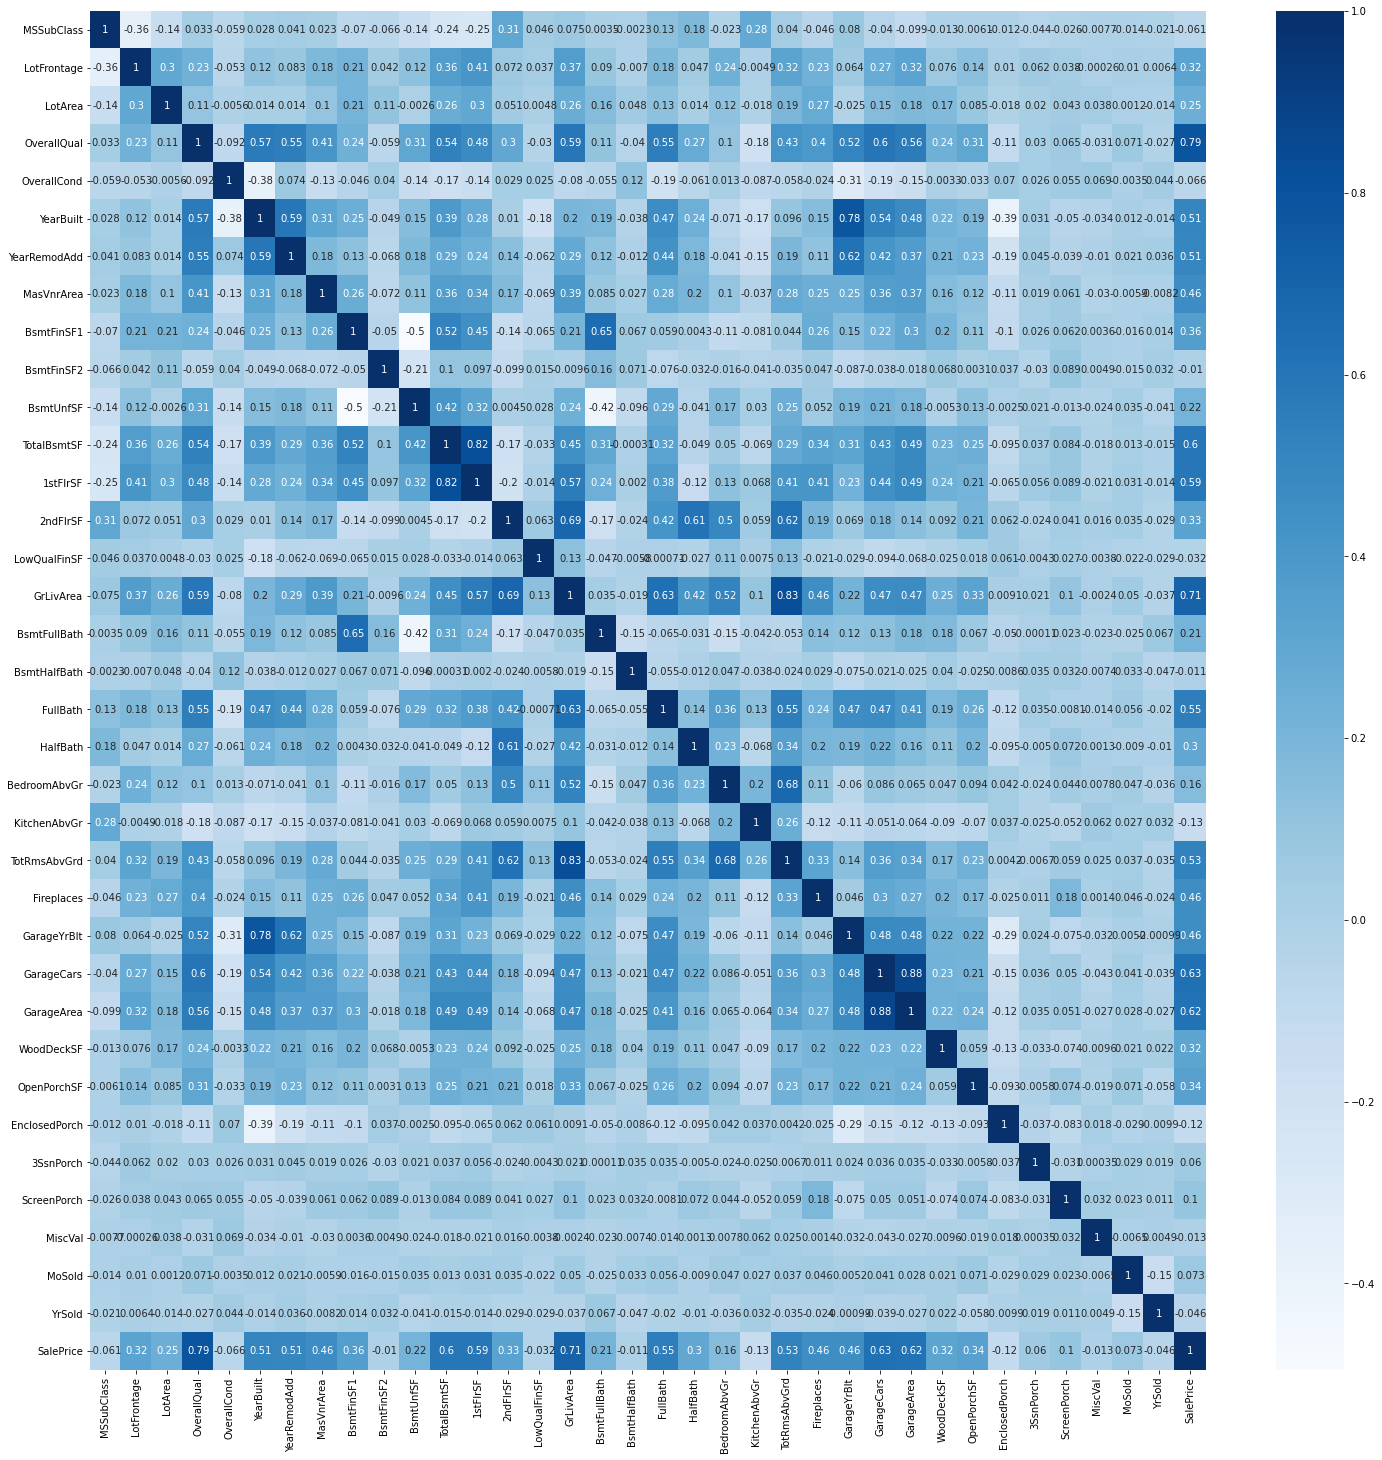

In [1150]:
#correlation
fig = plt.figure(figsize=(25,25))
cor_matrix = df.corr(method='pearson')
sns.heatmap(cor_matrix,annot = True,cmap = 'Blues')
plt.show()

In [1151]:
#lets check for the correlation of input columns with Target Variable
cor_matrix['SalePrice'].sort_values(ascending = False)

SalePrice        1.000000
OverallQual      0.789185
GrLivArea        0.707300
GarageCars       0.628329
GarageArea       0.619000
TotalBsmtSF      0.595042
1stFlrSF         0.587642
FullBath         0.554988
TotRmsAbvGrd     0.528363
YearBuilt        0.514408
YearRemodAdd     0.507831
MasVnrArea       0.463662
Fireplaces       0.459611
GarageYrBlt      0.457296
BsmtFinSF1       0.362874
OpenPorchSF      0.339500
2ndFlrSF         0.330386
LotFrontage      0.323828
WoodDeckSF       0.315444
HalfBath         0.295592
LotArea          0.249499
BsmtUnfSF        0.215724
BsmtFullBath     0.212924
BedroomAbvGr     0.158281
ScreenPorch      0.100284
MoSold           0.072764
3SsnPorch        0.060119
BsmtFinSF2      -0.010151
BsmtHalfBath    -0.011109
MiscVal         -0.013071
LowQualFinSF    -0.032381
YrSold          -0.045508
MSSubClass      -0.060775
OverallCond     -0.065642
EnclosedPorch   -0.115004
KitchenAbvGr    -0.132108
Name: SalePrice, dtype: float64

## Data Visulatization

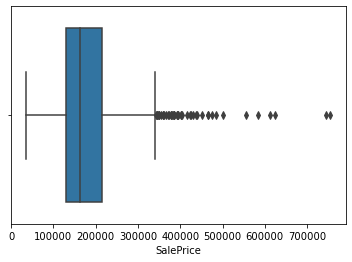

In [1152]:
#lets check the box plot of our target column, to check if there are outliers
sns.boxplot(df.SalePrice[:1168])
plt.show()

In [1153]:
#we have some outliers in our target column

#lets check it out
z = np.abs(zscore(df.SalePrice[:1168]))
print(np.where(z>3))
print("\n Outlier Count in Target column is :",len(np.where(z>3)[0]))

(array([  78,  103,  141,  232,  241,  300,  305,  369,  394,  423,  504,
        561,  691,  839,  858,  914, 1032], dtype=int64),)

 Outlier Count in Target column is : 17


In [1154]:
#we have 17 outliers among 1168 rows in target column

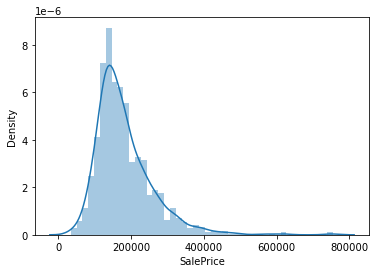

In [1155]:
#lets check the distribution of the target column
sns.distplot(df.SalePrice[:1168])
plt.show()

In [1156]:
#Target column is slightly right skewed

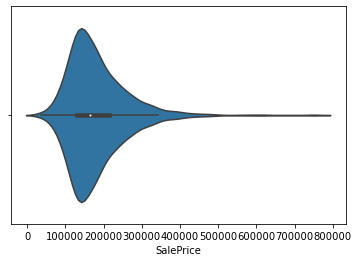

In [1157]:
sns.violinplot(df.SalePrice[:1168])
plt.show()

## Bivariate Analysis with Target Variable

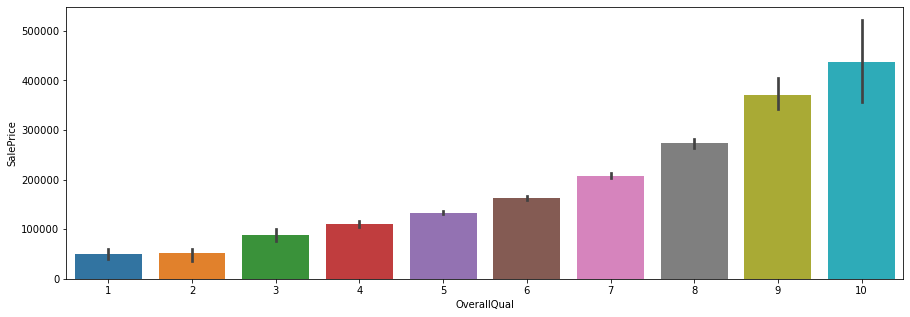

In [1158]:
#Lets check this column againt our target variable
plt.figure(figsize= (15,5))
col1 = sns.barplot(x = df['OverallQual'] , y =df['SalePrice'] )
plt.show()

From the above plot we can see that if the rating is good then the House price will also increse

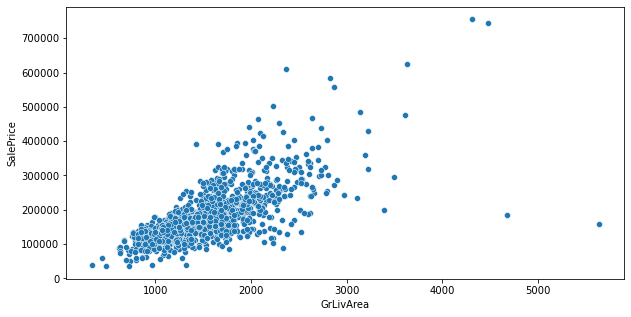

In [1159]:
#Lets check this column againt our target variable
plt.figure(figsize= (10,5))
col1 = sns.scatterplot(x = df['GrLivArea'] , y =df['SalePrice'] )
plt.show()

From the above plot we can see that if the Ground Living area square feet is high then the House price will also increse

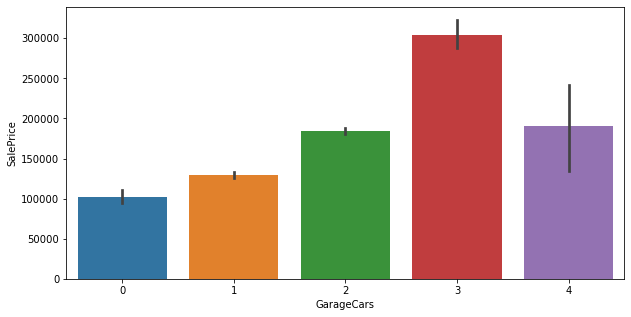

In [1160]:
#Lets check this column againt our target variable
plt.figure(figsize= (10,5))
col1 = sns.barplot(x = df['GarageCars'] , y =df['SalePrice'] )
plt.show()

From the above plot we can see that if the Garage car capacity is 3 or 4 then the House price will be high

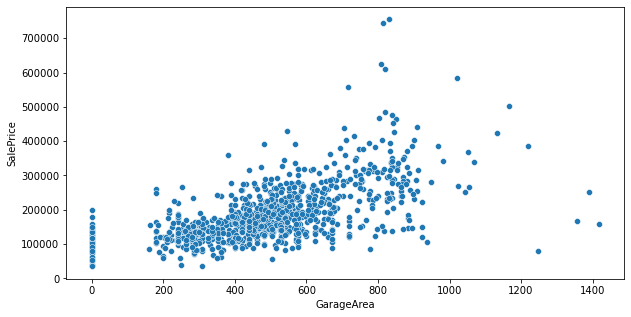

In [1161]:
#Lets check this column againt our target variable
plt.figure(figsize= (10,5))
col1 = sns.scatterplot(x = df['GarageArea'] , y =df['SalePrice'] )
plt.show()

From the above plot we can see that with increse in the Garage area capacity area the House price will also increse

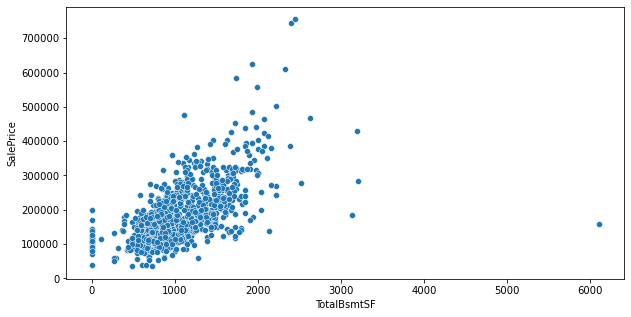

In [1162]:
#Lets check this column againt our target variable
plt.figure(figsize= (10,5))
col1 = sns.scatterplot(x = df['TotalBsmtSF'] , y =df['SalePrice'] )
plt.show()

From the above plot we can see that with increse in the Total Basement square feet capacity area the House price will also increse

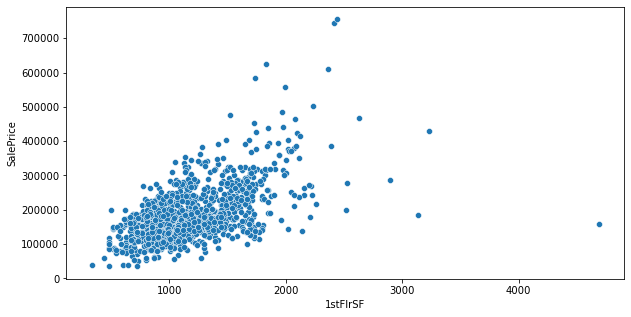

In [1163]:
#Lets check this column againt our target variable
plt.figure(figsize= (10,5))
col1 = sns.scatterplot(x = df['1stFlrSF'] , y =df['SalePrice'] )
plt.show()

From the above plot we can see that with increse in the First floor sqaure feet area the House price will also increse

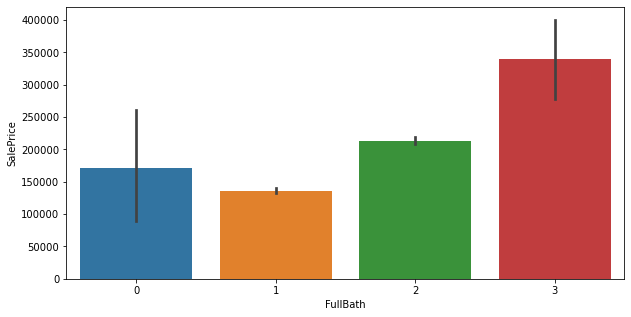

In [1164]:
#Lets check this column againt our target variable
plt.figure(figsize= (10,5))
col1 = sns.barplot(x = df['FullBath'] , y =df['SalePrice'] )
plt.show()

From the above plot we can see that if the Full bathrooms above grade is 3 then the House price will be high 

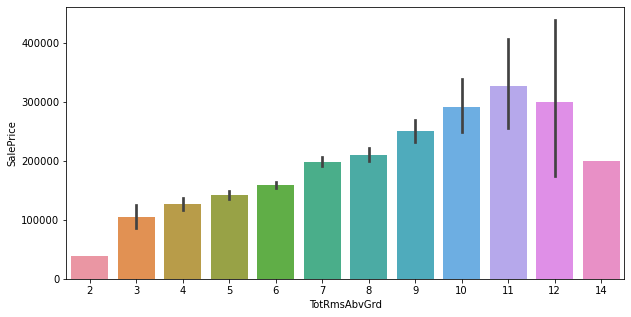

In [1165]:
#Lets check this column againt our target variable
plt.figure(figsize= (10,5))
col1 = sns.barplot(x = df['TotRmsAbvGrd'] , y =df['SalePrice'] )
plt.show()

From the above plot we can see that with the increse in the total Room above grade, the house will also increse till 11

## Checking for Outliers in  Numerical Columns

In [1166]:
Numerical_columns = []
for i in df.columns:
    if df[i].dtype != 'object':
        Numerical_columns.append(i)
Numerical_columns

['MSSubClass',
 'LotFrontage',
 'LotArea',
 'OverallQual',
 'OverallCond',
 'YearBuilt',
 'YearRemodAdd',
 'MasVnrArea',
 'BsmtFinSF1',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 '1stFlrSF',
 '2ndFlrSF',
 'LowQualFinSF',
 'GrLivArea',
 'BsmtFullBath',
 'BsmtHalfBath',
 'FullBath',
 'HalfBath',
 'BedroomAbvGr',
 'KitchenAbvGr',
 'TotRmsAbvGrd',
 'Fireplaces',
 'GarageYrBlt',
 'GarageCars',
 'GarageArea',
 'WoodDeckSF',
 'OpenPorchSF',
 'EnclosedPorch',
 '3SsnPorch',
 'ScreenPorch',
 'MiscVal',
 'MoSold',
 'YrSold',
 'SalePrice']

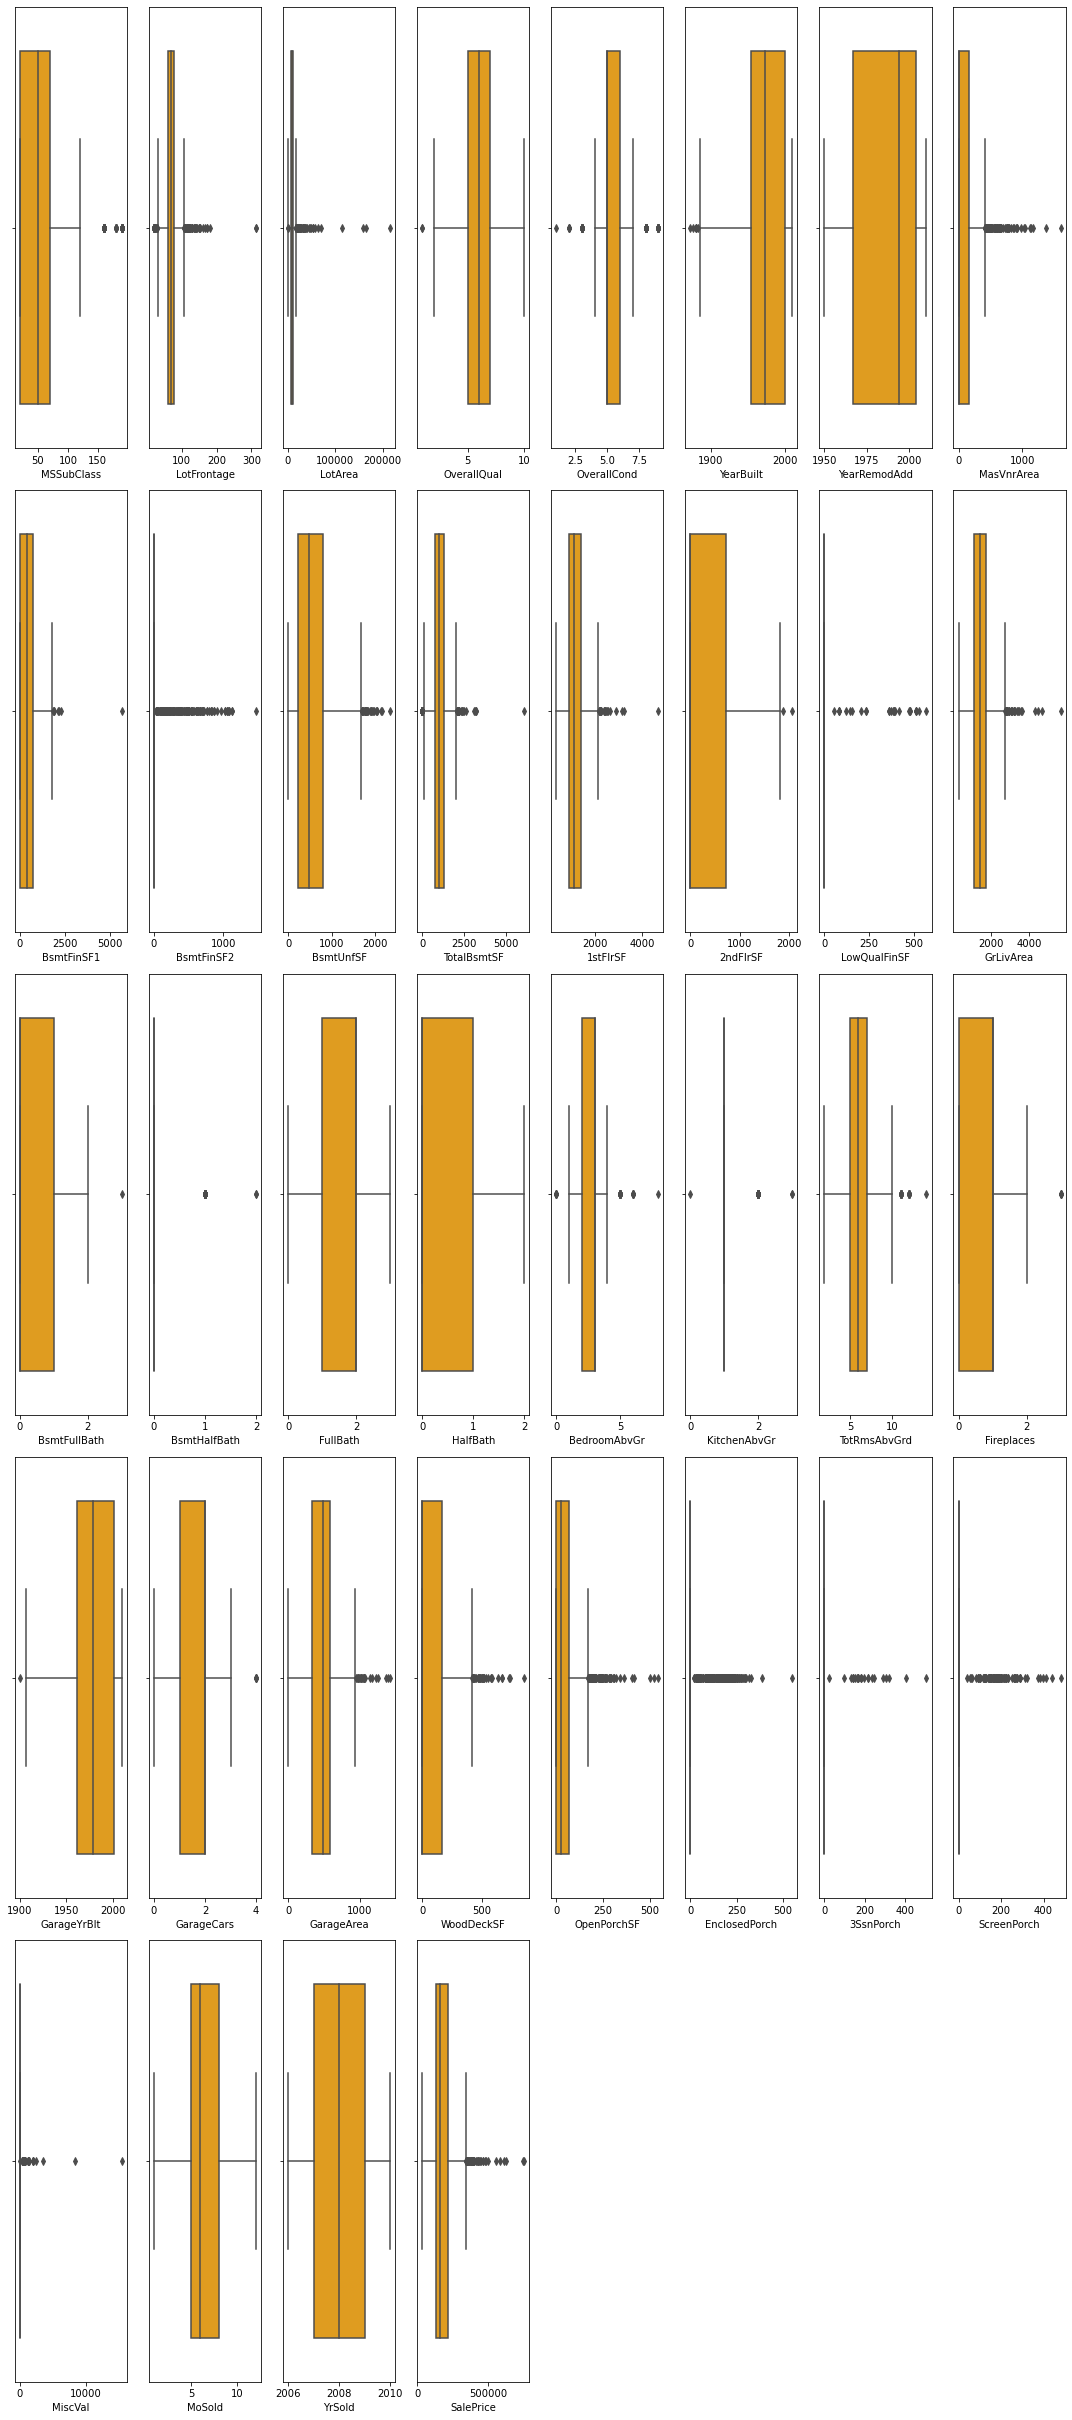

In [1167]:
# lets check for outliers among all the columns Numerical columns
collist = Numerical_columns
ncol = 8
nrows = 6
plt.figure(figsize= (15,5*ncol))
for i in range(0,len(collist)):
    plt.subplot(nrows,ncol,i+1)
    sns.boxplot(df[collist[i]],color='orange',orient = 'v')
    plt.tight_layout()

## In Most of the Numerical Columns if Some Feature is Not Present, It is Represented as Zero. It is mentioned in the description.

In [1168]:
#we can see that those columns are filled with outliers
#so lets replace zero in those columns with 'No' and not zero elememt as 'Yes'.

In [1169]:
#lets write a function to convert some columns to object datatype
def imbalanced_column(x):
    if x == 0:
        return 'No'
    else:
        return 'Yes'

In [1170]:
pd.unique(df.ScreenPorch)

array([  0, 224,  95, 265,  53, 192, 480, 128, 189, 140, 160, 410, 204,
       155, 216, 182, 126, 116, 168, 178,  90, 185, 147, 184, 153, 266,
       222, 271, 273,  99, 176, 288,  60, 122, 180,  80, 225, 120, 144,
        63, 156, 165, 440, 175, 161, 145, 143, 252, 190, 142,  40, 100,
       200, 260, 259, 154, 322, 291, 287, 197, 163, 385, 170, 198, 130,
       396, 263, 119, 152, 233, 220, 276, 312, 210, 374, 234], dtype=int64)

In [1171]:
#we can see that almost all the values are zero so lets replace 0 values as no screen porch
len(df.loc[df.ScreenPorch == 0])

1344

In [1172]:
#applying the above function
df.ScreenPorch = df.ScreenPorch.apply(imbalanced_column)

In [1173]:
#we can see that almost all the values are zero so lets replace 0 values as no screen porch
len(df.loc[df['3SsnPorch'] == 0])

1436

In [1174]:
#applying the above function
df['3SsnPorch'] = df['3SsnPorch'].apply(imbalanced_column)

In [1175]:
#we can 1408 rows with 0 values in Misc Val column
len(df.loc[df.MiscVal == 0])

1408

In [1176]:
#applying the above function
df.MiscVal = df.MiscVal.apply(imbalanced_column)

In [1177]:
#we can 1252 rows with 0 values in EnclosedPorch column
len(df.loc[df.EnclosedPorch == 0])

1252

In [1178]:
#applying the above function
df.EnclosedPorch = df.EnclosedPorch.apply(imbalanced_column)

In [1179]:
#we can 1378 rows with 0 values in BsmtHalfBath column
len(df.loc[df.BsmtHalfBath == 0])

1378

In [1180]:
#applying the above function
df.BsmtHalfBath = df.BsmtHalfBath.apply(imbalanced_column)

In [1181]:
#we can 1378 rows with 0 values in BsmtFinSF2 column
len(df.loc[df.BsmtFinSF2 == 0])

1293

In [1182]:
#applying the above function  
df.BsmtFinSF2 = df.BsmtFinSF2.apply(imbalanced_column)

In [1183]:
#we can 1434 rows with 0 values in LowQualFinSF column
len(df.loc[df.LowQualFinSF == 0])

1434

In [1184]:
#applying the above function  
df.LowQualFinSF = df.LowQualFinSF.apply(imbalanced_column)

In [1185]:
#we need to convert KitchenABvGr column as object column because it will be more valueable.
pd.unique(df.KitchenAbvGr)

array([1, 2, 3, 0], dtype=int64)

In [1186]:
#lets convert this columns as object datatype
df.KitchenAbvGr = df.KitchenAbvGr.astype('object')

In [1187]:
Numerical_columns = []
for i in df.columns:
    if df[i].dtype != 'object':
        Numerical_columns.append(i)
Numerical_columns

['MSSubClass',
 'LotFrontage',
 'LotArea',
 'OverallQual',
 'OverallCond',
 'YearBuilt',
 'YearRemodAdd',
 'MasVnrArea',
 'BsmtFinSF1',
 'BsmtUnfSF',
 'TotalBsmtSF',
 '1stFlrSF',
 '2ndFlrSF',
 'GrLivArea',
 'BsmtFullBath',
 'FullBath',
 'HalfBath',
 'BedroomAbvGr',
 'TotRmsAbvGrd',
 'Fireplaces',
 'GarageYrBlt',
 'GarageCars',
 'GarageArea',
 'WoodDeckSF',
 'OpenPorchSF',
 'MoSold',
 'YrSold',
 'SalePrice']

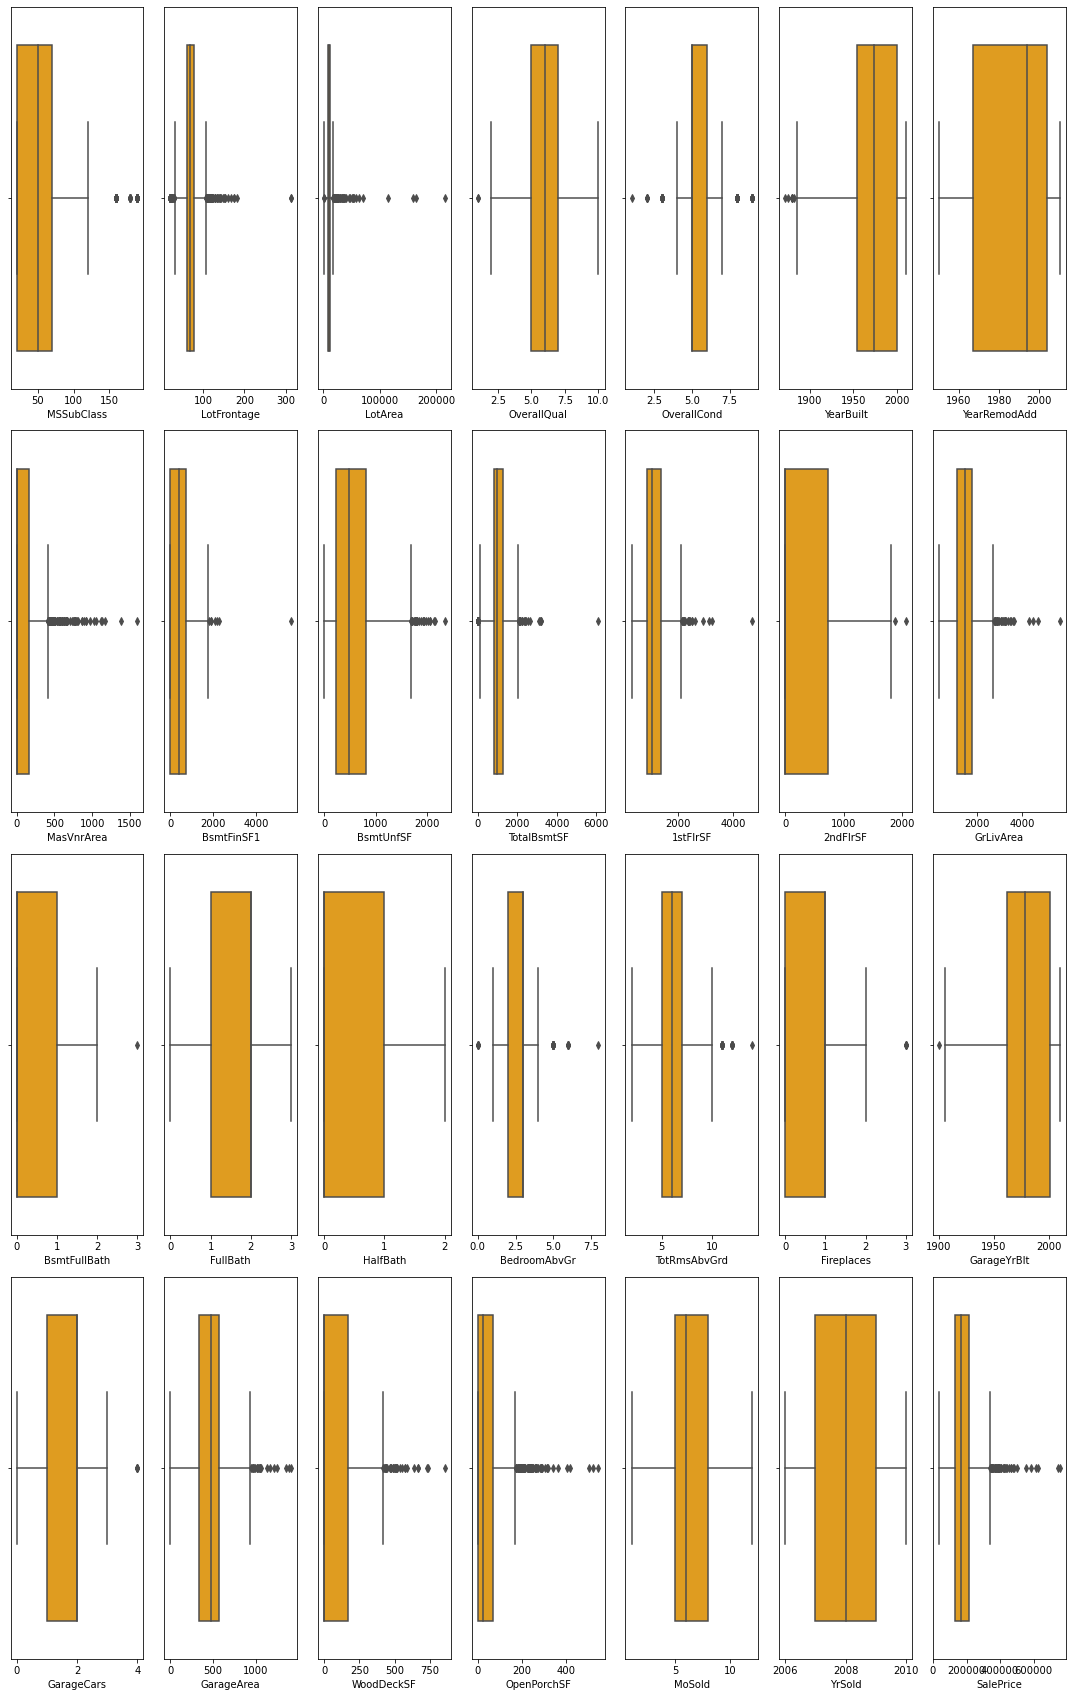

In [1188]:
# lets check for outliers among all the columns Numerical columns
collist = Numerical_columns
ncol = 7
nrows = 6
plt.figure(figsize= (15,5*ncol))
for i in range(0,len(collist)):
    plt.subplot(nrows,ncol,i+1)
    sns.boxplot(df[collist[i]],color='orange',orient = 'v')
    plt.tight_layout()

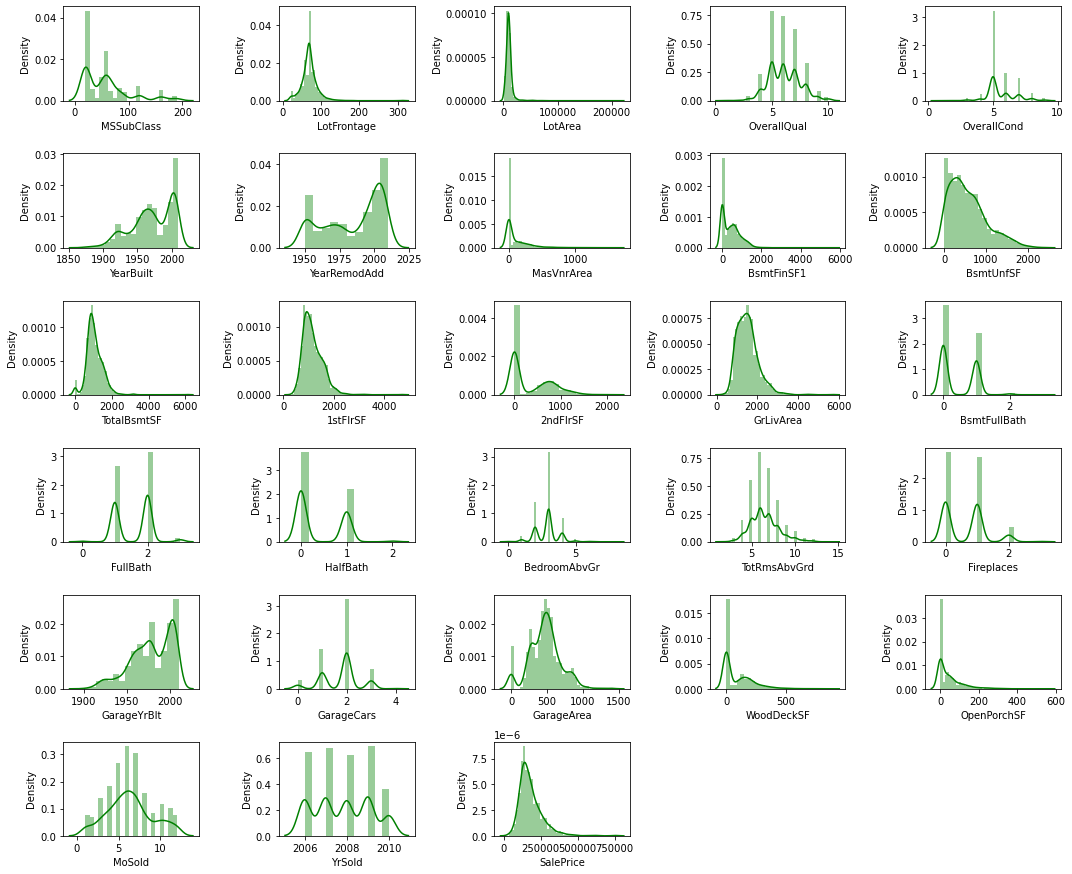

In [1189]:
# Lets check the distribution
collist = Numerical_columns
ncol = 5
nrows = 10
plt.figure(figsize= (15,20))
for i in range(0,len(collist)):
    plt.subplot(nrows,ncol,i+1)
    sns.distplot(df[collist[i]],color='green')
    plt.tight_layout()

In [1190]:
#from the above plot we see that columns that should be object datatype is represent as numerical datatype

## These are Numerical columns which needs to converted to object datatype

In [1191]:
Numerical_object_columns = []
for i in Numerical_columns:
    if len(pd.unique(df[i])) <= 15:
        Numerical_object_columns.append(i)
Numerical_object_columns

['MSSubClass',
 'OverallQual',
 'OverallCond',
 'BsmtFullBath',
 'FullBath',
 'HalfBath',
 'BedroomAbvGr',
 'TotRmsAbvGrd',
 'Fireplaces',
 'GarageCars',
 'MoSold',
 'YrSold']

In [1192]:
for i in Numerical_object_columns:
    df[i] = df[i].astype('object')

In [1193]:
Numerical_object_columns

['MSSubClass',
 'OverallQual',
 'OverallCond',
 'BsmtFullBath',
 'FullBath',
 'HalfBath',
 'BedroomAbvGr',
 'TotRmsAbvGrd',
 'Fireplaces',
 'GarageCars',
 'MoSold',
 'YrSold']

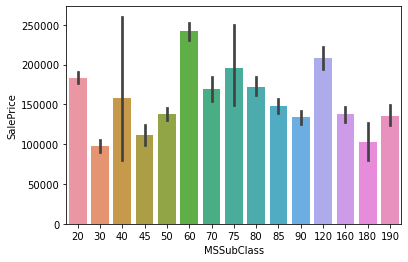

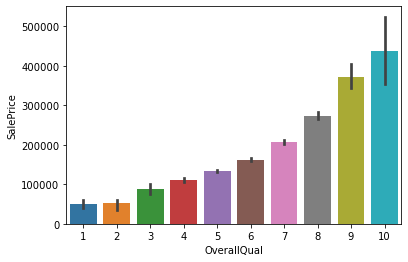

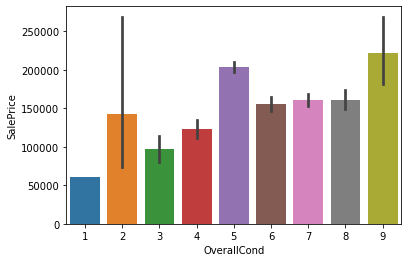

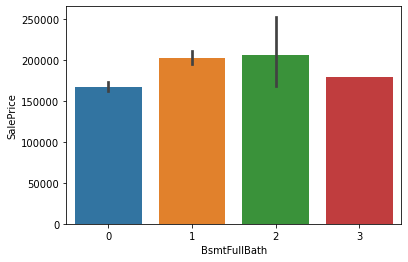

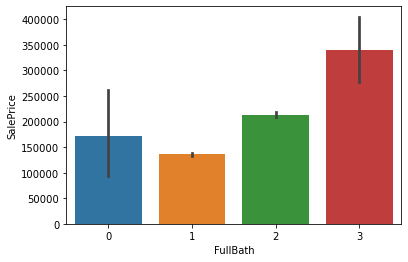

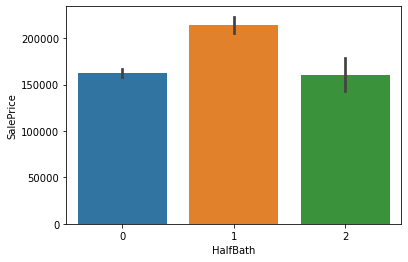

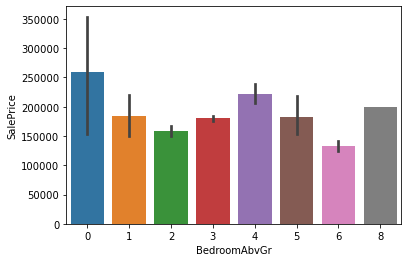

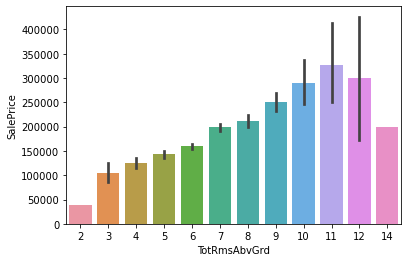

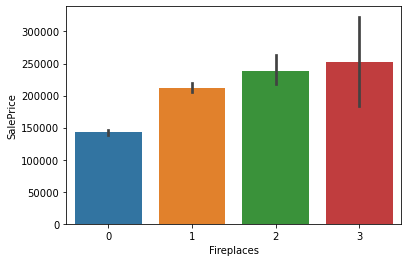

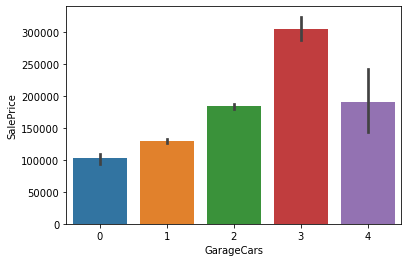

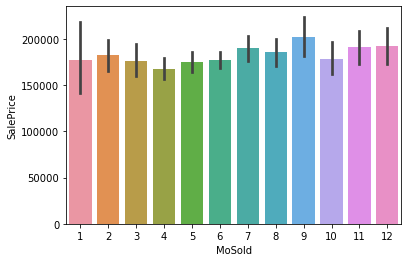

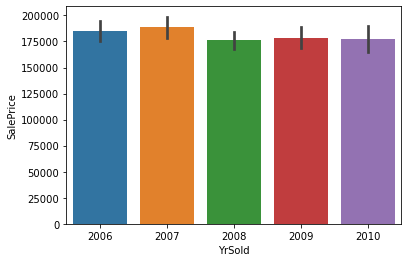

In [1194]:
for i in Numerical_object_columns:
    sns.barplot(x = df[i], y = df.SalePrice)
    plt.show()

## Outlier Removal

In [1195]:
Numerical_columns = []
for i in df.columns:
    if df[i].dtype != 'object':
        Numerical_columns.append(i)
Numerical_columns

['LotFrontage',
 'LotArea',
 'YearBuilt',
 'YearRemodAdd',
 'MasVnrArea',
 'BsmtFinSF1',
 'BsmtUnfSF',
 'TotalBsmtSF',
 '1stFlrSF',
 '2ndFlrSF',
 'GrLivArea',
 'GarageYrBlt',
 'GarageArea',
 'WoodDeckSF',
 'OpenPorchSF',
 'SalePrice']

In [1196]:
#Function of outlier Removal when data is not normal distributed or Right skewed
def outliers_IQR3(data_frame,feature_name):
    IQR  =data_frame[feature_name].quantile(0.75)-data_frame[feature_name].quantile(0.25)
    lower_boundary = data_frame[feature_name].quantile(0.25) - (IQR * 1.5)
    upper_boundary = data_frame[feature_name].quantile(0.75) + (IQR * 1.5)
    df.loc[df[feature_name] >= upper_boundary,feature_name]= upper_boundary
    df.loc[df[feature_name] <= lower_boundary,feature_name]= lower_boundary

In [1197]:
##Function of outlier Removal when data looks like normal distributed.
def outliers_normally(data_frame,feature_name):
    lower_boundary = data_frame[feature_name].mean() - 3*data_frame[feature_name].std()
    upper_boundary = data_frame[feature_name].mean() + 3*data_frame[feature_name].std()
    df.loc[df[feature_name] >= upper_boundary,feature_name]= upper_boundary
    df.loc[df[feature_name] <= lower_boundary,feature_name]= lower_boundary

In [1198]:
#lets remove the outliers, to exclude the Salesprice column
for i in Numerical_columns[:-1]:
    outliers_IQR3(df,i)

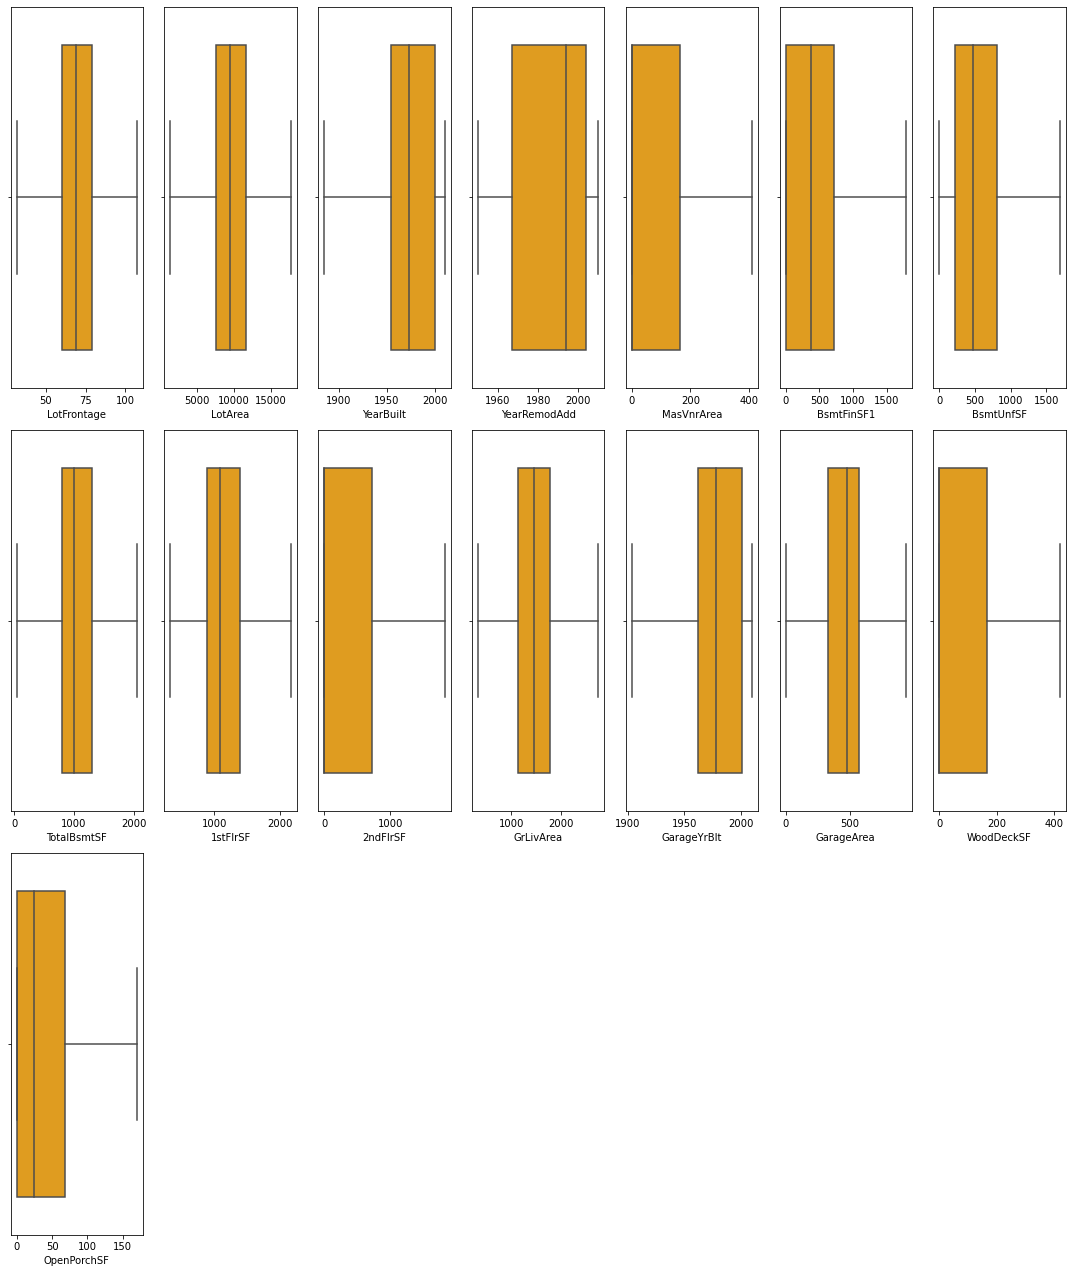

In [1199]:
# lets check for outliers among all the columns Numerical columns
collist = Numerical_columns[:-1]
ncol = 7
nrows = 6
plt.figure(figsize= (15,5*ncol))
for i in range(0,len(collist)):
    plt.subplot(nrows,ncol,i+1)
    sns.boxplot(df[collist[i]],color='orange',orient = 'v')
    plt.tight_layout()

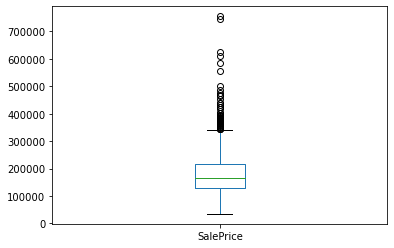

In [1200]:
#now we have outliers only in Target column because the test data is all NAN.
df.SalePrice.plot(kind = 'box')
plt.show()

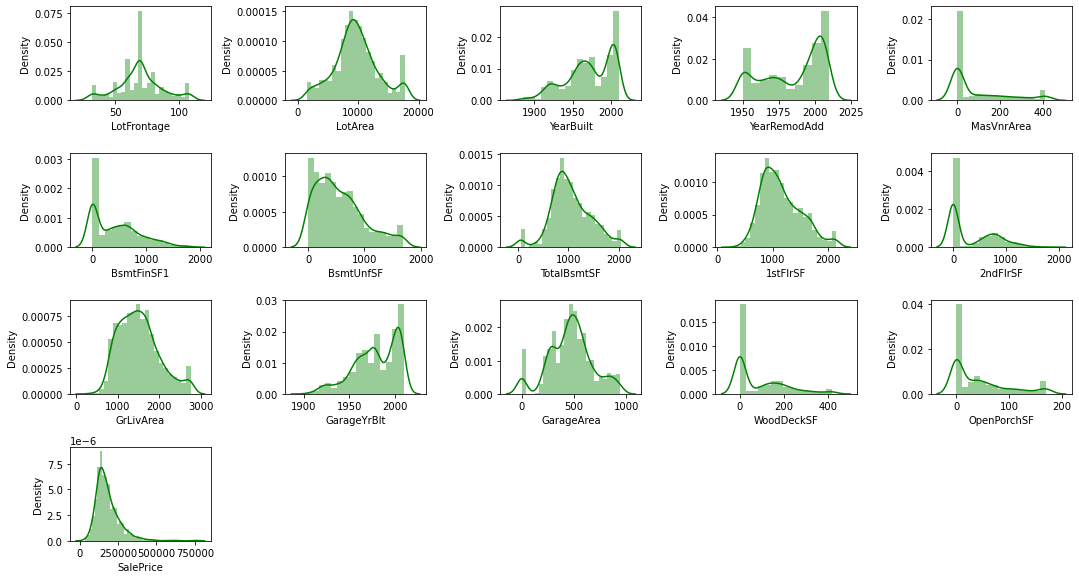

In [1201]:
# Lets check the distribution
collist = Numerical_columns
ncol = 5
nrows = 10
plt.figure(figsize= (15,20))
for i in range(0,len(collist)):
    plt.subplot(nrows,ncol,i+1)
    sns.distplot(df[collist[i]],color='green')
    plt.tight_layout()

In [1202]:
#we can see that after outlier removal columns are normal distributed

## Skewness Reduction

In [1203]:
#Lest check the skewness of these numerical columns
for i in Numerical_columns:
    if (df[i].skew() > 0.5 ) or (df[i].skew() < -0.5) :
        print(i, df[i].skew())

YearBuilt -0.5940202867484121
YearRemodAdd -0.5035620027004708
MasVnrArea 1.2812933553758221
BsmtFinSF1 0.739876671476788
BsmtUnfSF 0.7969305034158221
1stFlrSF 0.6641337448938754
2ndFlrSF 0.800108959691417
GrLivArea 0.5935558345342847
GarageYrBlt -0.666039792258119
WoodDeckSF 1.0836730926474039
OpenPorchSF 1.1363011278690092
SalePrice 1.953877705368286


In [1204]:
#Reducing the skewness using power transform method for all the columns whose skewness is out of range -0.5 to +0.5
collist = Numerical_columns[:-1]
for i in range(len(collist)):
    if df[collist[i]].skew() > 0.5:
        arr = df[collist[i]].values
        arr = arr.reshape(-1,1)
        arr = power_transform(arr)
        df[collist[i]] = arr 
    elif df[collist[i]].skew() < -0.5 :
        arr = df[collist[i]].values
        arr = arr.reshape(-1,1)
        arr = power_transform(arr)
        df[collist[i]] = arr    
    else:
        pass
    
#Lest check the skewness of these numerical columns after skewness reduction
for i in Numerical_columns:
    if (df[i].skew() > 0.5 ) or (df[i].skew() < -0.5) :
        print(i, df[i].skew())

SalePrice 1.953877705368286


In [1205]:
#Skewness has been reducd very column except target columns it has nan values form row 1669

In [1206]:
df.shape

(1460, 79)

In [1207]:
#dropping temp column
temp = df['Temp']

df.drop('Temp',axis =1 ,inplace = True)

## Encoding the object columns

In [1208]:
#lets convert object columns with two unique values using ordinal encoding
for i in df.columns:
    if  (df[i].dtypes == 'object') and (len(df[i].unique()) == 2):
        print(i)

Street
Utilities
BsmtFinSF2
CentralAir
LowQualFinSF
BsmtHalfBath
EnclosedPorch
3SsnPorch
ScreenPorch
MiscVal


In [1209]:
#lets convert above object columns with two unique values using ordinal encoding
o_encoding = OrdinalEncoder()
for i in df.columns:
    if (df[i].dtypes == 'object') and (len(df[i].unique()) == 2):
        df[i] = o_encoding.fit_transform(df[i].values.reshape(-1,1))

In [1210]:
#now the above columns are converted using ordinal encoding

In [1211]:
df.shape

(1460, 78)

In [1212]:
#lets print out the object columns with more than two unique values
one_hot_columns = []
for i in df.columns:
    if df[i].dtype == 'object':
        print(i,len(pd.unique(df[i])))
        one_hot_columns.append(i)

MSSubClass 15
MSZoning 5
Alley 3
LotShape 4
LandContour 4
LotConfig 5
LandSlope 3
Neighborhood 25
Condition1 9
Condition2 8
BldgType 5
HouseStyle 8
OverallQual 10
OverallCond 9
RoofStyle 6
RoofMatl 8
Exterior1st 15
Exterior2nd 16
MasVnrType 4
ExterQual 4
ExterCond 5
Foundation 6
BsmtQual 5
BsmtCond 5
BsmtExposure 5
BsmtFinType1 7
BsmtFinType2 7
Heating 6
HeatingQC 5
Electrical 5
BsmtFullBath 4
FullBath 4
HalfBath 3
BedroomAbvGr 8
KitchenAbvGr 4
KitchenQual 4
TotRmsAbvGrd 12
Functional 7
Fireplaces 4
FireplaceQu 6
GarageType 7
GarageFinish 4
GarageCars 5
GarageQual 6
GarageCond 6
PavedDrive 3
PoolQC 4
Fence 5
MoSold 12
YrSold 5
SaleType 9
SaleCondition 6


In [1213]:
#we need convert the above columns one-hot encoder, since they are not ordinal values
#and also columns contains more than 2 unique values

df_new = pd.get_dummies(data = df,columns=one_hot_columns)

In [1214]:
df_new.shape

(1460, 376)

### we have now 376 columns

In [1215]:
df_new.head()

,LotFrontage,LotArea,Street,Utilities,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,CentralAir,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtHalfBath,GarageYrBlt,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,MiscVal,SalePrice,MSSubClass_20,MSSubClass_30,MSSubClass_40,MSSubClass_45,MSSubClass_50,MSSubClass_60,MSSubClass_70,MSSubClass_75,MSSubClass_80,MSSubClass_85,MSSubClass_90,MSSubClass_120,MSSubClass_160,MSSubClass_180,MSSubClass_190,MSZoning_C (all),MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Alley_Grvl,Alley_No Alley Access,Alley_Pave,LotShape_IR1,LotShape_IR2,LotShape_IR3,LotShape_Reg,LandContour_Bnk,LandContour_HLS,LandContour_Low,LandContour_Lvl,LotConfig_Corner,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,LandSlope_Gtl,LandSlope_Mod,LandSlope_Sev,Neighborhood_Blmngtn,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,Condition1_Artery,Condition1_Feedr,Condition1_Norm,Condition1_PosA,Condition1_PosN,Condition1_RRAe,Condition1_RRAn,Condition1_RRNe,Condition1_RRNn,Condition2_Artery,Condition2_Feedr,Condition2_Norm,Condition2_PosA,Condition2_PosN,Condition2_RRAe,Condition2_RRAn,Condition2_RRNn,BldgType_1Fam,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,HouseStyle_1.5Fin,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,OverallQual_1,OverallQual_2,OverallQual_3,OverallQual_4,OverallQual_5,OverallQual_6,OverallQual_7,OverallQual_8,OverallQual_9,OverallQual_10,OverallCond_1,OverallCond_2,OverallCond_3,OverallCond_4,OverallCond_5,OverallCond_6,OverallCond_7,OverallCond_8,OverallCond_9,RoofStyle_Flat,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,RoofMatl_ClyTile,RoofMatl_CompShg,RoofMatl_Membran,RoofMatl_Metal,RoofMatl_Roll,RoofMatl_Tar&Grv,RoofMatl_WdShake,RoofMatl_WdShngl,Exterior1st_AsbShng,Exterior1st_AsphShn,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stone,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior2nd_AsbShng,Exterior2nd_AsphShn,Exterior2nd_Brk Cmn,Exterior2nd_BrkFace,Exterior2nd_CBlock,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Other,Exterior2nd_Plywood,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,MasVnrType_BrkCmn,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Stone,ExterQual_Ex,ExterQual_Fa,ExterQual_Gd,ExterQual_TA,ExterCond_Ex,ExterCond_Fa,ExterCond_Gd,ExterCond_Po,ExterCond_TA,Foundation_BrkTil,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,BsmtQual_Ex,BsmtQual_Fa,BsmtQual_Gd,BsmtQual_No Basement,BsmtQual_TA,BsmtCond_Fa,BsmtCond_Gd,BsmtCond_No Basement,BsmtCond_Po,BsmtCond_TA,BsmtExposure_Av,BsmtExposure_Gd,BsmtExposure_Mn,BsmtExposure_No,BsmtExposure_No Basement,BsmtFinType1_ALQ,BsmtFinType1_BLQ,BsmtFinType1_GLQ,BsmtFinType1_LwQ,BsmtFinType1_No Basement,BsmtFinType1_Rec,BsmtFinType1_Unf,BsmtFinType2_ALQ,BsmtFinType2_BLQ,BsmtFinType2_GLQ,BsmtFinType2_LwQ,BsmtFinType2_No Basement,BsmtFinType2_Rec,BsmtFinType2_Unf,Heating_Floor,Heating_GasA,Heating_GasW,Heating_Grav,Heating_OthW,Heating_Wall,HeatingQC_Ex,HeatingQC_Fa,HeatingQC_Gd,HeatingQC_Po,HeatingQC_TA,Electrical_FuseA,Electrical_FuseF,Electrical_FuseP,Electrical_Mix,Electrical_SBrkr,BsmtFullBath_0,BsmtFullBath_1,BsmtFullBath_2

## Scaling the Data

In [1216]:
#lets split our x and y column before scaling
#x and y spitting
Y = df_new['SalePrice']
X = df_new.drop('SalePrice',axis = 1)

In [1217]:
X.shape

(1460, 375)

In [1218]:
#Lets scale the data using standard scaler
scaler = StandardScaler()
scaled_X = pd.DataFrame(scaler.fit_transform(X),columns= X.columns)
scaled_X.head()

,LotFrontage,LotArea,Street,Utilities,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,CentralAir,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtHalfBath,GarageYrBlt,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,MiscVal,MSSubClass_20,MSSubClass_30,MSSubClass_40,MSSubClass_45,MSSubClass_50,MSSubClass_60,MSSubClass_70,MSSubClass_75,MSSubClass_80,MSSubClass_85,MSSubClass_90,MSSubClass_120,MSSubClass_160,MSSubClass_180,MSSubClass_190,MSZoning_C (all),MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Alley_Grvl,Alley_No Alley Access,Alley_Pave,LotShape_IR1,LotShape_IR2,LotShape_IR3,LotShape_Reg,LandContour_Bnk,LandContour_HLS,LandContour_Low,LandContour_Lvl,LotConfig_Corner,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,LandSlope_Gtl,LandSlope_Mod,LandSlope_Sev,Neighborhood_Blmngtn,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,Condition1_Artery,Condition1_Feedr,Condition1_Norm,Condition1_PosA,Condition1_PosN,Condition1_RRAe,Condition1_RRAn,Condition1_RRNe,Condition1_RRNn,Condition2_Artery,Condition2_Feedr,Condition2_Norm,Condition2_PosA,Condition2_PosN,Condition2_RRAe,Condition2_RRAn,Condition2_RRNn,BldgType_1Fam,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,HouseStyle_1.5Fin,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,OverallQual_1,OverallQual_2,OverallQual_3,OverallQual_4,OverallQual_5,OverallQual_6,OverallQual_7,OverallQual_8,OverallQual_9,OverallQual_10,OverallCond_1,OverallCond_2,OverallCond_3,OverallCond_4,OverallCond_5,OverallCond_6,OverallCond_7,OverallCond_8,OverallCond_9,RoofStyle_Flat,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,RoofMatl_ClyTile,RoofMatl_CompShg,RoofMatl_Membran,RoofMatl_Metal,RoofMatl_Roll,RoofMatl_Tar&Grv,RoofMatl_WdShake,RoofMatl_WdShngl,Exterior1st_AsbShng,Exterior1st_AsphShn,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stone,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior2nd_AsbShng,Exterior2nd_AsphShn,Exterior2nd_Brk Cmn,Exterior2nd_BrkFace,Exterior2nd_CBlock,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Other,Exterior2nd_Plywood,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,MasVnrType_BrkCmn,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Stone,ExterQual_Ex,ExterQual_Fa,ExterQual_Gd,ExterQual_TA,ExterCond_Ex,ExterCond_Fa,ExterCond_Gd,ExterCond_Po,ExterCond_TA,Foundation_BrkTil,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,BsmtQual_Ex,BsmtQual_Fa,BsmtQual_Gd,BsmtQual_No Basement,BsmtQual_TA,BsmtCond_Fa,BsmtCond_Gd,BsmtCond_No Basement,BsmtCond_Po,BsmtCond_TA,BsmtExposure_Av,BsmtExposure_Gd,BsmtExposure_Mn,BsmtExposure_No,BsmtExposure_No Basement,BsmtFinType1_ALQ,BsmtFinType1_BLQ,BsmtFinType1_GLQ,BsmtFinType1_LwQ,BsmtFinType1_No Basement,BsmtFinType1_Rec,BsmtFinType1_Unf,BsmtFinType2_ALQ,BsmtFinType2_BLQ,BsmtFinType2_GLQ,BsmtFinType2_LwQ,BsmtFinType2_No Basement,BsmtFinType2_Rec,BsmtFinType2_Unf,Heating_Floor,Heating_GasA,Heating_GasW,Heating_Grav,Heating_OthW,Heating_Wall,HeatingQC_Ex,HeatingQC_Fa,HeatingQC_Gd,HeatingQC_Po,HeatingQC_TA,Electrical_FuseA,Electrical_FuseF,Electrical_FuseP,Electrical_Mix,Electrical_SBrkr,BsmtFullBath_0,BsmtFullBath_1,BsmtFullBath_2,BsmtFullB

In [1219]:
#now our data is scaled using standard scaler

## PCA (Principal Component Analysis):

In [1220]:
#we need to use pca becuase we have 375 columns in this dataset which is very high

In [1221]:
#we should always use scaled data for performing the PCA

In [1222]:
#we have 175 columns excluding target variable
scaled_X.shape

(1460, 375)

In [1223]:
#first lets TEST out percentage of data that we will obtain after PCA
testpca = PCA()
test_x = testpca.fit(scaled_X)

In [1224]:
#now lets out cumulative score 
cum_score = np.cumsum(test_x.explained_variance_ratio_)*100
cum_score  

array([  5.81103679,   8.54867707,  10.84458604,  12.90947074,
        14.83768018,  16.49651246,  17.92475375,  19.29595169,
        20.5233257 ,  21.57225248,  22.6137964 ,  23.60319706,
        24.56610221,  25.4934657 ,  26.3574577 ,  27.20158271,
        28.03222985,  28.85291522,  29.64774083,  30.42441539,
        31.18693034,  31.94458967,  32.68488793,  33.40457782,
        34.11214242,  34.81398415,  35.50147312,  36.1835954 ,
        36.84860321,  37.49709241,  38.14445587,  38.78285793,
        39.4026917 ,  40.01863841,  40.62899276,  41.23556876,
        41.8293685 ,  42.41365431,  42.99372859,  43.56654551,
        44.12677136,  44.68193012,  45.23429824,  45.77309612,
        46.30828765,  46.83830843,  47.36344105,  47.88218695,
        48.39485916,  48.89874933,  49.39585631,  49.88782221,
        50.37656068,  50.86403131,  51.34609737,  51.82636726,
        52.30394345,  52.77168989,  53.23410072,  53.69156191,
        54.14622422,  54.59714736,  55.04279913,  55.48

In [1225]:
#lets check how many columns gives 95% of variance
s = np.argmax(cum_score > 95)
print("Number of components expaining 95% of variance is :", s)

Number of components expaining 95% of variance is : 220


In [1226]:
#lets check how many columns gives 90% of variance
s = np.argmax(cum_score > 90)
print("Number of components expaining 90% of variance is :", s)

Number of components expaining 90% of variance is : 185


In [1227]:
#now we have seen that how much data will be lost based number of columns

In [1228]:
#so lets take 90% data which is equlivalent to 185 columns
#from 375 columns , we reduced it to 185 columns using PCA

s = np.argmax(cum_score > 90)
print("Number of components expaining 90% of variance is :", s)

Number of components expaining 90% of variance is : 185


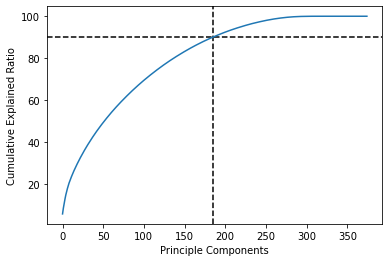

In [1229]:
#lets plot the graph for graphical understanding
plt.ylabel('Cumulative Explained Ratio')
plt.xlabel('Principle Components')

plt.axvline(x = s, color = 'k', linestyle = '--')
plt.axhline(y = 90, color = 'k', linestyle = '--')

plt.plot(cum_score)
plt.show()

From the above plot we can see that for 185 columns 90% of data will be retrived

In [1230]:
#lets perform the PCA with 185 columns
Final_pca = PCA(n_components= 185)
pca_x = pd.DataFrame(Final_pca.fit_transform(scaled_X))

In [1231]:
#lets create a dataframe
pca_x.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184
0,-0.274122,-2.218051,0.707118,-2.904241,-2.190258,1.359657,1.991453,1.087194,1.694777,5.271733,-0.100128,-4.056475,-1.638875,-0.934349,2.750870,1.832331,-1.221961,0.168915,-1.767991,-0.206273,0.405814,1.893399,-2.608462,1.830715,-0.464430,-1.644289,-1.959180,2.367296,0.430183,-2.593475,-1.119248,-1.479181,2.649858,1.210201,0.651410,-0.872518,-0.992255,-2.051075,-0.283414,-1.487550,2.065283,2.061365,0.657858,0.876988,1.094237,0.032990,1.020813,-2.220578,-0.180142,-0.991673,0.512047,0.396918,-0.111684,0.506459,0.023459,2.401696,0.755940,-0.966046,-0.387035,0.508608,0.019926,-1.913315,-0.994182,1.116451,0.899967,1.061711,1.082109,1.226119,0.620952,1.047511,-0.147698,0.626036,1.367759,-0.570923,0.171469,-0.186889,0.149585,-1.717066,-1.076136,0.280864,-0.779755,1.045769,0.923786,-0.642508,-0.812181,0.604167,0.260773,-1.636995,0.732812,-0.021946,0.047070,0.314228,0.324081,0.958244,0.922396,-1.208463,-0.170284,-1.785217,1.584486,1.281376,0.048968,-2.182388,0.481107,-0.337917,0.737897,0.489912,-1.368157,-0.020826,-0.829799,0.086627,-0.656449,-0.658002,-0.525549,0.023302,0.569521,-0.705150,-1.477558,-1.199218,-0.413812,0.179074,0.736872,1.260704,0.061013,-0.220540,0.014906,-1.556473,-0.866862,0.958993,0.434832,-1.200544,2.055068,0.235054,0.118025,0.835251,1.586810,-0.094765,1.107985,-0.142167,-0.077417,-0.450148,-0.010389,0.202694,0.952835,-1.152846,0.399603,0.078645,0.303432,1.691732,0.251173,-1.863477,1.275212,-0.726659,1.340501,-0.857409,0.500296,-1.545852,-0.518431,-0.386501,0.581810,-0.306803,-0.298706,-0.492951,-0.735898,-0.858044,-0.294250,-0.224399,0.576996,-0.725417,-1.461776,-0.078306,0.576537,-0.117893,0.009788,0.880752,1.497281,-0.170800,-0.242175,0.254726,0.133905,-0.287916,0.386331,-0.326260,-0.759105,1.083337,0.664702
1,-2.083373,-4.507596,3.592632,5.552256,3.309428,1.864773,1.062184,7.987384,1.085397,-0.403121,2.656812,-5.066904,-2.068340,2.488510,-4.255241,-1.851287,4.915482,-3.044347,0.841459,-2.655855,-2.533535,1.136745,-0.057696,-2.767132,-0.678716,2.059844,5.172499,1.794530,0.209172,-2.452559,2.572494,-0.776769,0.300303,0.540616,1.527560,0.560626,0.892325,0.950496,2.341210,-0.540097,2.685789,0.241697,-1.606980,1.452944,-2.414150,1.333850,-0.644245,0.692817,-0.748236,0.281072,0.500880,-2.449728,-0.491285,-1.124699,-2.117881,2.091757,-0.683116,0.272074,1.757261,0.114928,0.591527,0.771752,-0.423749,2.348590,0.236382,-0.153324,0.416219,-1.188304,-0.407894,0.424278,1.711986,-0.207987,0.940104,-1.187355,0.356740,-0.139091,-1.258730,1.557973,1.943897,0.008442,0.385844,-0.628645,0.009824,-0.633562,-1.967003,-3.087781,-0.461942,-0.108716,0.429485,-0.024698,1.255559,-0.290623,0.095597,-0.083123,-2.284993,-0.874308,-0.140191,-0.202147,-0.636989,-0.345792,0.198663,-1.443475,0.196069,-0.006077,-0.196207,3.291000,0.159702,-1.403142,0.627371,-0.350287,-0.530256,0.731973,-0.881788,2.134307,-1.409802,1.331205,2.743438,-2.176867,-2.546026,0.120904,0.545317,-0.600865,0.827578,-0.999176,-0.107763,-0.654208,0.094205,0.907657,1.566794,0.490313,-0.229765,-0.796708,-0.776667,-1.555327,-0.193911,0.154076,-1.268082,-0.836010,-1.422512,1.018499,-0.486262,0.198055,-0.459029,-0.177560,-1.191045,-0.059078,-0.939504,-1.563858,-1.842140,0.642451,-2.153803,1.993284,-1.425021,-0.445391,0.423931,-3.377713,-0.376442,-0.460274,-1.104892,-0.075968,1.729183,2.879487,0.717092,-0.190069,-0.059246,-2.481359,-1.779267,0.054054,-2.034378,

## Data preprocessing is Done

In [1232]:
#Now lets get our actual traing and test data 

In [1233]:
#lets first add temp column splitting
pca_x['Temp'] = temp

In [1234]:
#Lets get out Original Train and Test Dataset provided in the project
X_train_original = pca_x.loc[pca_x["Temp"] == "Train"]
X_test_original = pca_x.loc[pca_x["Temp"]=="Test"]
#X_train_original.reset_index(drop =True, inplace=True)
#X_test_original.reset_index(drop = True, inplace=True)

In [1235]:
#lets drop the null values in the Y column
Y.dropna(inplace=True)
Y.shape

(1168,)

In [1236]:
#Original X_train dataset
X_train_original.shape

(1168, 186)

In [1237]:
#Original X_test dataset
X_test_original.shape

(292, 186)

In [1238]:
#no null values in this series
Y.isnull().sum()

0

In [1239]:
# Original X train column from 0th row to 8422th row
X_train_original.drop('Temp',axis = 1,inplace  =True)

In [1240]:
# Original X test column from 8523rd row to 14203rd row
X_test_original.drop('Temp',axis = 1,inplace  =True)

In [1241]:
#lets Ignore thos index now
X_train_original.reset_index(drop =True, inplace=True)
X_test_original.reset_index(drop = True, inplace=True)

## We have provided with X_test data, but Y_test (Label) is not provided

So lets use our X_train_original and Y_train_Original  as X and Y for model selection

## Best random state

In [1242]:
max_r2score = 0
rand_state = 0
for i in range(1,200):
    x_train,x_test,y_train,y_test = train_test_split(X_train_original,Y,test_size=.22,random_state= i )
    lr = LinearRegression()
    lr.fit(x_train,y_train)
    pred = lr.predict(x_test)
    r2 = r2_score(y_test,pred)
    if r2 > max_r2score:
        max_r2score = r2
        rand_state = i
print('Best r2 score is {} on random state {}'.format(max_r2score,rand_state)) 

Best r2 score is 0.893812302311252 on random state 186


In [1243]:
print('We got our best randoms sate as :',rand_state)

We got our best randoms sate as : 186


In [1244]:
#Lets split for train and test data
x_train,x_test,y_train,y_test = train_test_split(X_train_original,Y,test_size=.22,random_state= rand_state )

## Model selection :

In [1245]:
#lets Choose r2 score of below four Models
lr =LinearRegression()
dtc = DecisionTreeRegressor()
knn = KNeighborsRegressor(n_neighbors=5)
rf = RandomForestRegressor()
ada = AdaBoostRegressor()

In [1246]:
#checking each model with Cross val score
model_list = [lr,dtc,knn,rf,ada]
least_difference = []
for m in model_list:
    m.fit(x_train,y_train)
    pred = m.predict(x_test)
    cvs = cross_val_score(m,X_train_original,Y,cv =5)
    print('\n')
    print(m)
    print('Scores :')
    print('r2 score:',r2_score(y_test,pred))
    print('Cross Val score :',cvs.mean())
    print('Error :')
    print('mean absolute error :',mean_absolute_error(y_test,pred))
    print('mean squared error : ', mean_squared_error(y_test,pred))
    print('root mean squared error :',np.sqrt(mean_squared_error(y_test,pred)))
    print('Difference :')
    difference = np.abs(r2_score(y_test,pred) - cvs.mean())
    print('Diffrence between cross val score and r2 score is : {0:.2f}'.format(difference))
    least_difference.append((m,'Diffrence between cross val score and r2 score error is : {0:.2f}'.format(difference)))



LinearRegression()
Scores :
r2 score: 0.893812302311252
Cross Val score : 0.7011743359431153
Error :
mean absolute error : 19397.086514896833
mean squared error :  895738369.3019328
root mean squared error : 29928.888541038956
Difference :
Diffrence between cross val score and r2 score is : 0.19


DecisionTreeRegressor()
Scores :
r2 score: 0.6047311694735258
Cross Val score : 0.5319512305646746
Error :
mean absolute error : 32490.046692607004
mean squared error :  3334260610.2023344
root mean squared error : 57743.0568138052
Difference :
Diffrence between cross val score and r2 score is : 0.07


KNeighborsRegressor()
Scores :
r2 score: 0.7196022551194191
Cross Val score : 0.7197811882092512
Error :
mean absolute error : 26399.29805447471
mean squared error :  2365274172.263035
root mean squared error : 48634.08447028724
Difference :
Diffrence between cross val score and r2 score is : 0.00


RandomForestRegressor()
Scores :
r2 score: 0.8061724682091309
Cross Val score : 0.791453348279

In [1247]:
least_difference

[(LinearRegression(),
  'Diffrence between cross val score and r2 score error is : 0.19'),
 (DecisionTreeRegressor(),
  'Diffrence between cross val score and r2 score error is : 0.07'),
 (KNeighborsRegressor(),
  'Diffrence between cross val score and r2 score error is : 0.00'),
 (RandomForestRegressor(),
  'Diffrence between cross val score and r2 score error is : 0.01'),
 (AdaBoostRegressor(),
  'Diffrence between cross val score and r2 score error is : 0.01')]

In [1248]:
#overfitted models
# 1 . Linear Regression  18% diffrence
# 2. Decision Tree   10% diffrence
# 3. Adaboost 3% diffrenece

In [1249]:
#we can see that Kneighbors and Random forest is not overfitted or underfitted since the diffrence is 0% and 1 % only

In [1250]:
#since the random forest is giving high R2 score 79% we choose random forest as our final model

## Hyperparameter Tuning:

In [1251]:
#Random forest and KNN are giving high r2 score

### 1. Random forest regressor - hyperparameter tuning

In [1252]:
#lets use random forest regressor
#it takes a lot lot of time approx 6 hours, so commented after
parameters = {'n_estimators' : [100,200,300],'criterion':['mse','mae'],'max_features':['auto','sqrt','log2']}
gsvrf = RandomizedSearchCV(rf, parameters, cv=5,scoring="r2")
gsvrf.fit(x_train,y_train)
print(gsvrf.best_score_)
print(gsvrf.best_params_)

0.7849227496932251
{'n_estimators': 200, 'max_features': 'auto', 'criterion': 'mae'}


In [1253]:
#best params for random forest
best_params_radom_forest = {'n_estimators': 200, 'max_features': 'auto', 'criterion': 'mae'}

In [1254]:
#lets create Random forest model using these parameters
print('Random Forest regressor')
hyper_p_rf = RandomForestRegressor(n_estimators= 200,criterion= 'mae',max_features = 'auto')
hyper_p_rf.fit(x_train,y_train)
hyper_p_pred_rf = hyper_p_rf.predict(x_test)
cvs = cross_val_score(hyper_p_rf,X_train_original,Y,cv =5)
print('\n')
print('Scores :')
print('r2 score:',r2_score(y_test,hyper_p_pred_rf))
print('Cross Val score :',cvs.mean())
print('Error :')
print('mean absolute error :',mean_absolute_error(y_test,hyper_p_pred_rf))
print('mean squared error : ', mean_squared_error(y_test,hyper_p_pred_rf))
print('root mean squared error :',np.sqrt(mean_squared_error(y_test,hyper_p_pred_rf)))
print('Difference :')
difference = np.abs(r2_score(y_test,hyper_p_pred_rf) - cvs.mean())
print('Diffrence between cross val score and r2 score is : {0:.2f}'.format(difference))
least_difference.append((hyper_p_rf,'Diffrence between cross val score and r2 score is : {0:.2f}'.format(difference)))

Random Forest regressor


Scores :
r2 score: 0.7974036997013467
Cross Val score : 0.7906618062293398
Error :
mean absolute error : 21398.410175097277
mean squared error :  1708985914.621161
root mean squared error : 41339.882856887256
Difference :
Diffrence between cross val score and r2 score is : 0.01


### 2. KNN regressor - Hyperparameter tuning

In [1255]:
#lets create the parameter list to pass in Randomised seracgh cv
parameters = {'n_neighbors':list(range(5,16,2)),'weights': ['uniform', 'distance'],
              'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],'leaf_size':list(range(25,35))}
#using randomised search CV
gsvkn = RandomizedSearchCV(estimator= knn , param_distributions= parameters,cv =5)
gsvkn.fit(x_train,y_train) 
print(gsvkn.best_score_)
print(gsvkn.best_params_)

0.7153567127386108
{'weights': 'distance', 'n_neighbors': 11, 'leaf_size': 33, 'algorithm': 'kd_tree'}


In [1256]:
#we got the best params for knn
best_params_knn  = {'weights': 'distance', 'n_neighbors': 9, 'leaf_size': 33, 'algorithm': 'kd_tree'}

In [1257]:
#lets create knn model using these parameters
print('KNeighborsRegressor')
hyper_p_knn = KNeighborsRegressor(n_neighbors= 5 ,weights= 'uniform', leaf_size= 26, algorithm= 'ball_tree')
hyper_p_knn.fit(x_train,y_train)
hyper_p_pred = hyper_p_knn.predict(x_test)
cvs = cross_val_score(hyper_p_knn,X_train_original,Y,cv =5)
print('\n')
print('Scores :')
print('r2 score:',r2_score(y_test,hyper_p_pred))
print('Cross Val score :',cvs.mean())
print('Error :')
print('mean absolute error :',mean_absolute_error(y_test,hyper_p_pred))
print('mean squared error : ', mean_squared_error(y_test,hyper_p_pred))
print('root mean squared error :',np.sqrt(mean_squared_error(y_test,hyper_p_pred)))
print('Difference :')
difference = np.abs(r2_score(y_test,hyper_p_pred) - cvs.mean())
print('Diffrence between cross val score and r2 score is : {0:.2f}'.format(difference))
least_difference.append((hyper_p_knn,'Diffrence between cross val score and r2 score is : {0:.2f}'.format(difference)))

KNeighborsRegressor


Scores :
r2 score: 0.7196022551194191
Cross Val score : 0.7197811882092512
Error :
mean absolute error : 26399.29805447471
mean squared error :  2365274172.263035
root mean squared error : 48634.08447028724
Difference :
Diffrence between cross val score and r2 score is : 0.00


In [1258]:
#lets choose random forest as our model since it having highest r2 score
#and also 0 diffrence between r2 score and cross val score

## Creating a Final Model as Random Forest Regressor

In [1259]:
final_model_rf = RandomForestRegressor(n_estimators= 200,criterion= 'mae',max_features = 'auto')
final_model_rf.fit(x_train,y_train)
final_pred = final_model_rf.predict(x_test)
cvs = cross_val_score(final_model_rf,X_train_original,Y,cv =5)
print('\n')
print('Scores :')
print('r2 score:',r2_score(y_test,final_pred))
print('Cross Val score :',cvs.mean())
print('Error :')
print('mean absolute error :',mean_absolute_error(y_test,final_pred))
print('mean squared error : ', mean_squared_error(y_test,final_pred))
print('root mean squared error :',np.sqrt(mean_squared_error(y_test,final_pred)))
print('Difference :')
difference = np.abs(r2_score(y_test,final_pred) - cvs.mean())
print('Diffrence between cross val score and r2 score is : {0:.2f}'.format(difference))
least_difference.append((m,'Diffrence between cross val score and r2 score is : {0:.2f}'.format(difference)))



Scores :
r2 score: 0.7913853322497666
Cross Val score : 0.7916843191192431
Error :
mean absolute error : 21782.75904669261
mean squared error :  1759753402.4212983
root mean squared error : 41949.41480427705
Difference :
Diffrence between cross val score and r2 score is : 0.00


In [1260]:
#now our r2 score got incresed 79.14% after hyperparameter tuning
#diffrence between cross val score and r2 score is also 0.00
#which means no overfitting

## Saving the model:

In [1261]:
#serialization using joblib
import joblib
joblib.dump(final_model_rf,'House_Price.obj')

['House_Price.obj']

In [1262]:
House_Price = joblib.load('House_Price.obj')

In [1263]:
s_pred = House_Price.predict(x_test)

In [1264]:
r2_score(y_test,s_pred)

0.7913853322497666

our r2_score is 76.14% percent

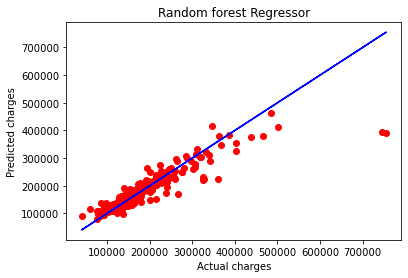

In [1265]:
#lets plot y_test vs predicted 

plt.figure(figsize=(6,4))
plt.scatter(x = y_test,y = s_pred,color = 'r')
plt.plot(y_test,y_test,color = 'b')
plt.xlabel('Actual charges')
plt.ylabel('Predicted charges')
plt.title('Random forest Regressor')
plt.show()

we can see that values are very close to the line

## predicted x_test

In [1266]:
#lets make a dataframe of actual answers vs predicted answers
conclusion = pd.DataFrame((House_Price.predict(x_test)[:],y_test[:]),index= ['Predicted','Actual'])
conclusion

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199,200,201,202,203,204,205,206,207,208,209,210,211,212,213,214,215,216,217,218,219,220,221,222,223,224,225,226,227,228,229,230,231,232,233,234,235,236,237,238,239,240,241,242,243,244,245,246,247,248,249,250,251,252,253,254,255,256
Predicted,130927.315,147911.16,199695.85,240551.08,230289.605,204152.965,168295.275,129741.715,107239.75,200826.75,92454.77,216416.79,146327.67,139156.595,263312.32,277199.545,206201.96,148874.19,389804.64,153029.83,91314.735,376941.955,153247.985,172392.86,214206.665,110563.165,188685.105,173470.66,170346.025,149583.55,185043.82,153566.31,197666.67,331715.13,221984.35,141758.855,202037.69,202548.335,176126.67,142899.41,224956.56,89028.815,203960.885,210371.655,135143.035,288851.435,128144.805,124361.11,130632.44,254542.675,165137.085,180910.77,320917.74,126923.05,220710.92,117566.66,127090.415,187010.68,166417.66,144630.56,380767.945,204101.695,137375.165,150694.3,324280.75,393070.205,247802.065,121386.985,196043.035,146572.3,416065.165,135335.695,298593.965,347459.175,250476.6,127831.71,147920.465,127765.6,383825.275,122453.295,163482.79,134209.3,110050.035,187135.25,124285.79,379792.255,107826.635,250864.945,208643.71,150036.82,132889.015,131304.48,173964.375,171236.54,153688.75,205346.605,464179.305,231092.495,141156.55,210254.06,211889.425,122759.035,239732.895,132395.625,213390.265,308938.405,122435.965,167348.0,200738.125,296653.265,133189.725,274492.65,127223.875,288622.245,98657.455,263706.66,199630.055,119754.23,259406.78,140197.175,220102.275,172180.445,102585.715,187972.725,172538.195,232118.925,312362.205,185813.345,173819.625,264128.09,174487.48,259137.955,121881.375,131287.815,176292.875,135727.0,140513.855,146690.705,231743.625,97261.49,120478.375,149042.875,304967.24,178487.715,209975.725,106992.18,142482.135,226252.72,132335.645,214123.93,204994.545,185305.615,248065.345,139206.315,126226.31,132679.59,183514.05,238521.16,267272.235,144657.75,105834.34,223772.5,170871.3,175371.0,118985.22,195870.37,305002.665,236697.665,186991.065,125539.165,313486.055,150842.26,129383.375,176456.085,228286.925,216466.335,126108.0,151964.64,163659.58,124591.055,145417.135,127547.75,189170.745,150735.215,187489.275,181838.575,119822.31,289890.905,238075.855,129633.12,126523.57,254032.53,127928.21,96542.75,151317.865,136114.87,115294.405,412522.885,133721.915,142627.47,254132.825,197579.28,211894.245,191811.94,252017.235,130490.695,119787.57,352713.29,126180.3,167736.55,125776.44,144749.1,128084.86,145333.145,227002.825,222844.455,81251.55,112713.4,127271.105,224969.5,144151.42,191202.875,143052.46,167942.085,100770.225,170472.815,113120.115,206972.45,133552.06,98613.52,152246.945,197718.2,168072.75,137413.69,107836.09,232874.665,200527.2,184866.895,137880.48,159932.84,156835.39,113507.64,124067.765,161784.55,231455.99,199250.9,184549.55,132184.755,162965.495,133209.88,117371.1,137176.36,114417.995,118596.68,103797.44,165769.89,192832.6
Actual,105000.000,155000.00,189000.00,225000.00,215000.000,194000.000,146500.000,118500.000,80000.00,215000.00,92900.00,208500.00,137900.00,163000.000,250000.00,306000.000,204900.00,131000.00,755000.00,157500.00,40000.000,437154.000,169000.000,165000.00,232000.000,95000.000,205000.000,175000.00,150900.000,146000.00,176485.00,163000.00,191000.00,311872.00,190000.00,150000.000,213500.00,180000.000

79% of Our answers are correct, and the model is also not overfitted

## Final Prediction : conclusion

In [1267]:
#lets predict the X_test_origanl, we don't have y_test_original values to compare

In [1268]:
final_y_predicted = House_Price.predict(X_test_original)

In [1269]:
final_y_predicted.shape

(292,)

In [1270]:
#lets create a dataframe of our final prediction
FINAL_Y_PREDICTED  = pd.DataFrame(final_y_predicted,columns = ['FINAL_Y_PREDICTED'])
FINAL_Y_PREDICTED

,FINAL_Y_PREDICTED
0,326888.450
1,209579.000
2,213492.085
3,157698.885
4,256764.270
...,...
287,221816.180
288,156138.760
289,151121.000
290,138115.595


In [1271]:
#exporting to excel sheet
FINAL_Y_PREDICTED.to_excel('FINAL_Y_PREDICTED_House.xlsx')

we have random forest model with 79% r2_score and no overfitting in the model